# Description
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

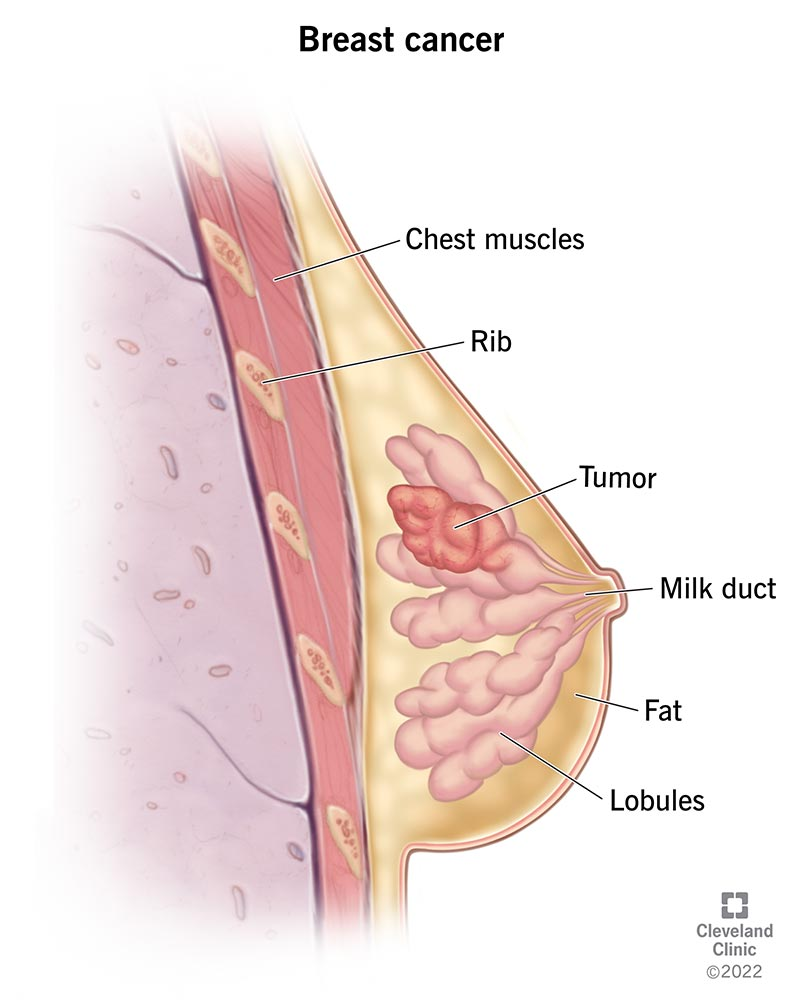

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

Since labels are discrete, the predictions falls into categorical type (i.e. Malignant or benign).

# Data Set Information
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Attribute Information:

1: ID number

2: Diagnosis (M = malignant, B = benign)

3-32:
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

**Webiste link for downloading dataset:**
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Import libraries, dataset, and set options

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

In [3]:
df = pd.read_csv("data.csv")

## Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:

1) The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).

2) Alternatively, one can also use “df.tail()” to return the five rows of the data frame.

3) For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,...,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,...,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,...,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,...,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,...,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Observations:**
Id column is redundant and not useful, we want to drop it

In [6]:
df.drop("id", axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 31)

In the result displayed, you can see the data has 569 records(rows), each with 32 columns.

In [8]:
# Review data types with "info()".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [9]:
#check for missing variables
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Observations:**
No null values are their in data.

In [10]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Observations:**
From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

***Now we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values.***

# Exploratory Data Analysis

**Objectives of Data Exploration:**

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

**The purpose of EDA is:**

   -> To use summary statistics and visualizations to better understand data, *find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
   
   -> For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.

## Descriptive statistics

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,...,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,...,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,...,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,...,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,...,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,...,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,...,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [13]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Observations:**
357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

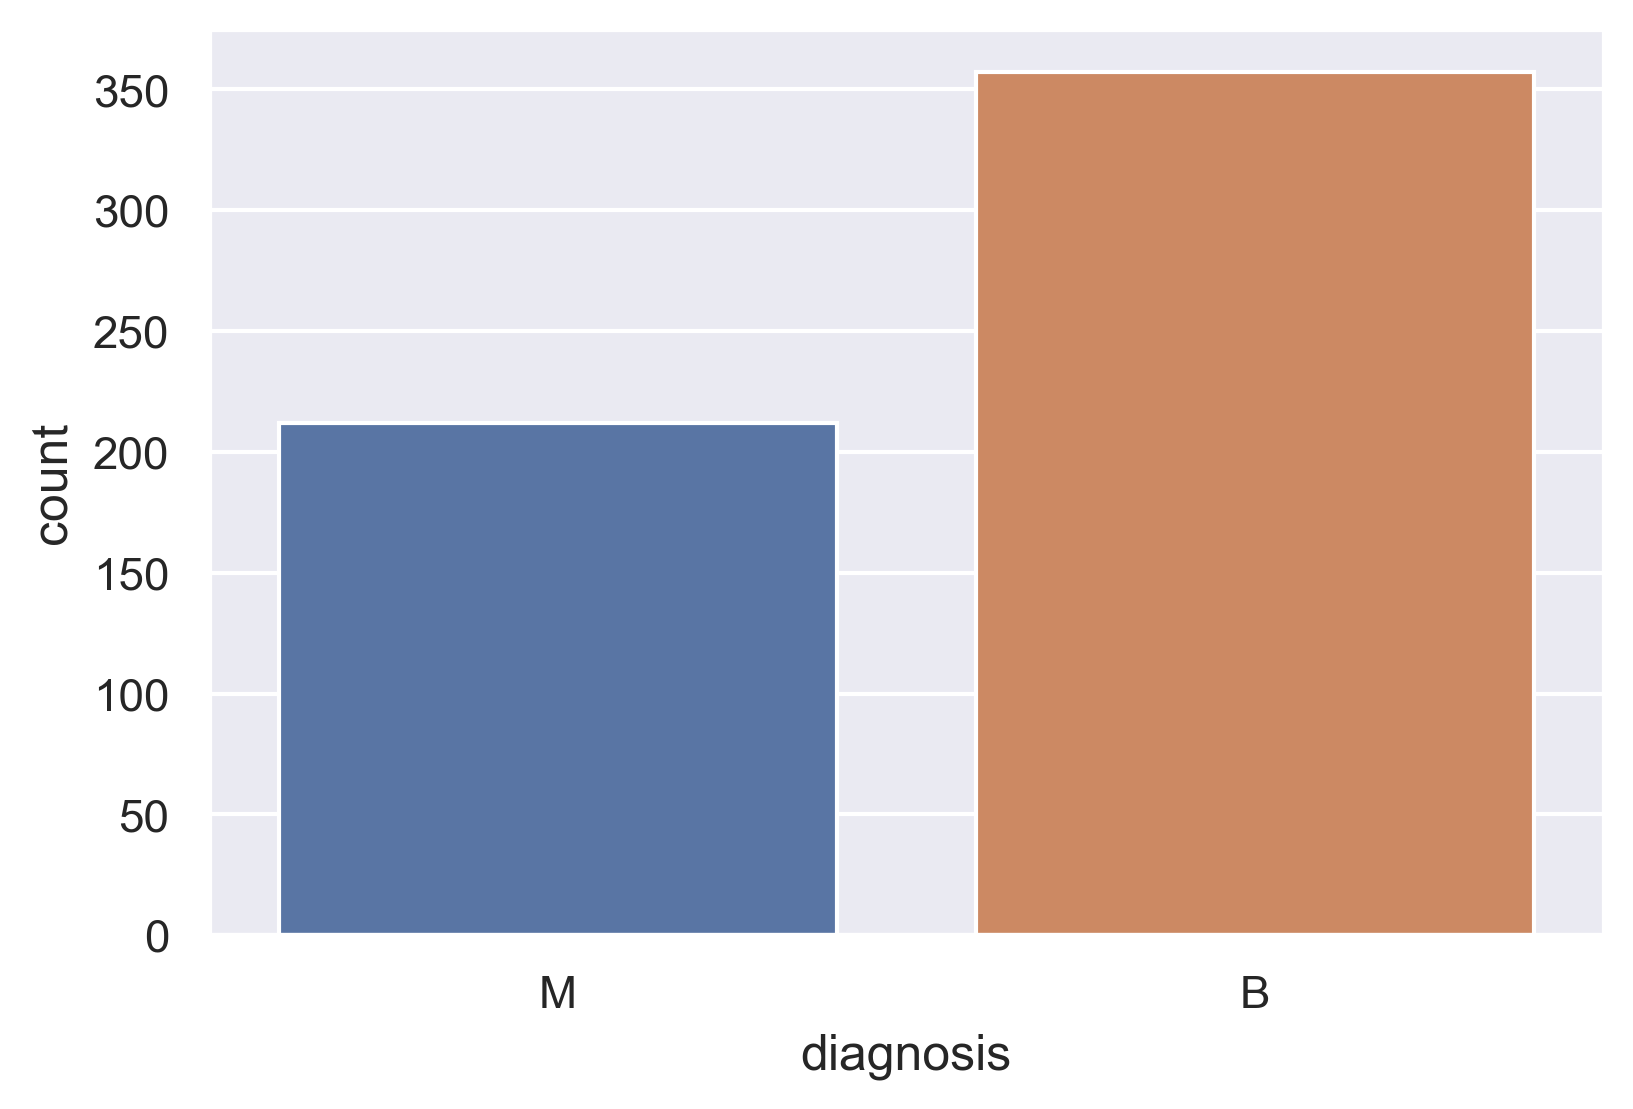

In [14]:
sns.countplot(x = "diagnosis", data = df)

In [15]:
df_mean=df.iloc[:,1:11]

In [16]:
df_mean.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

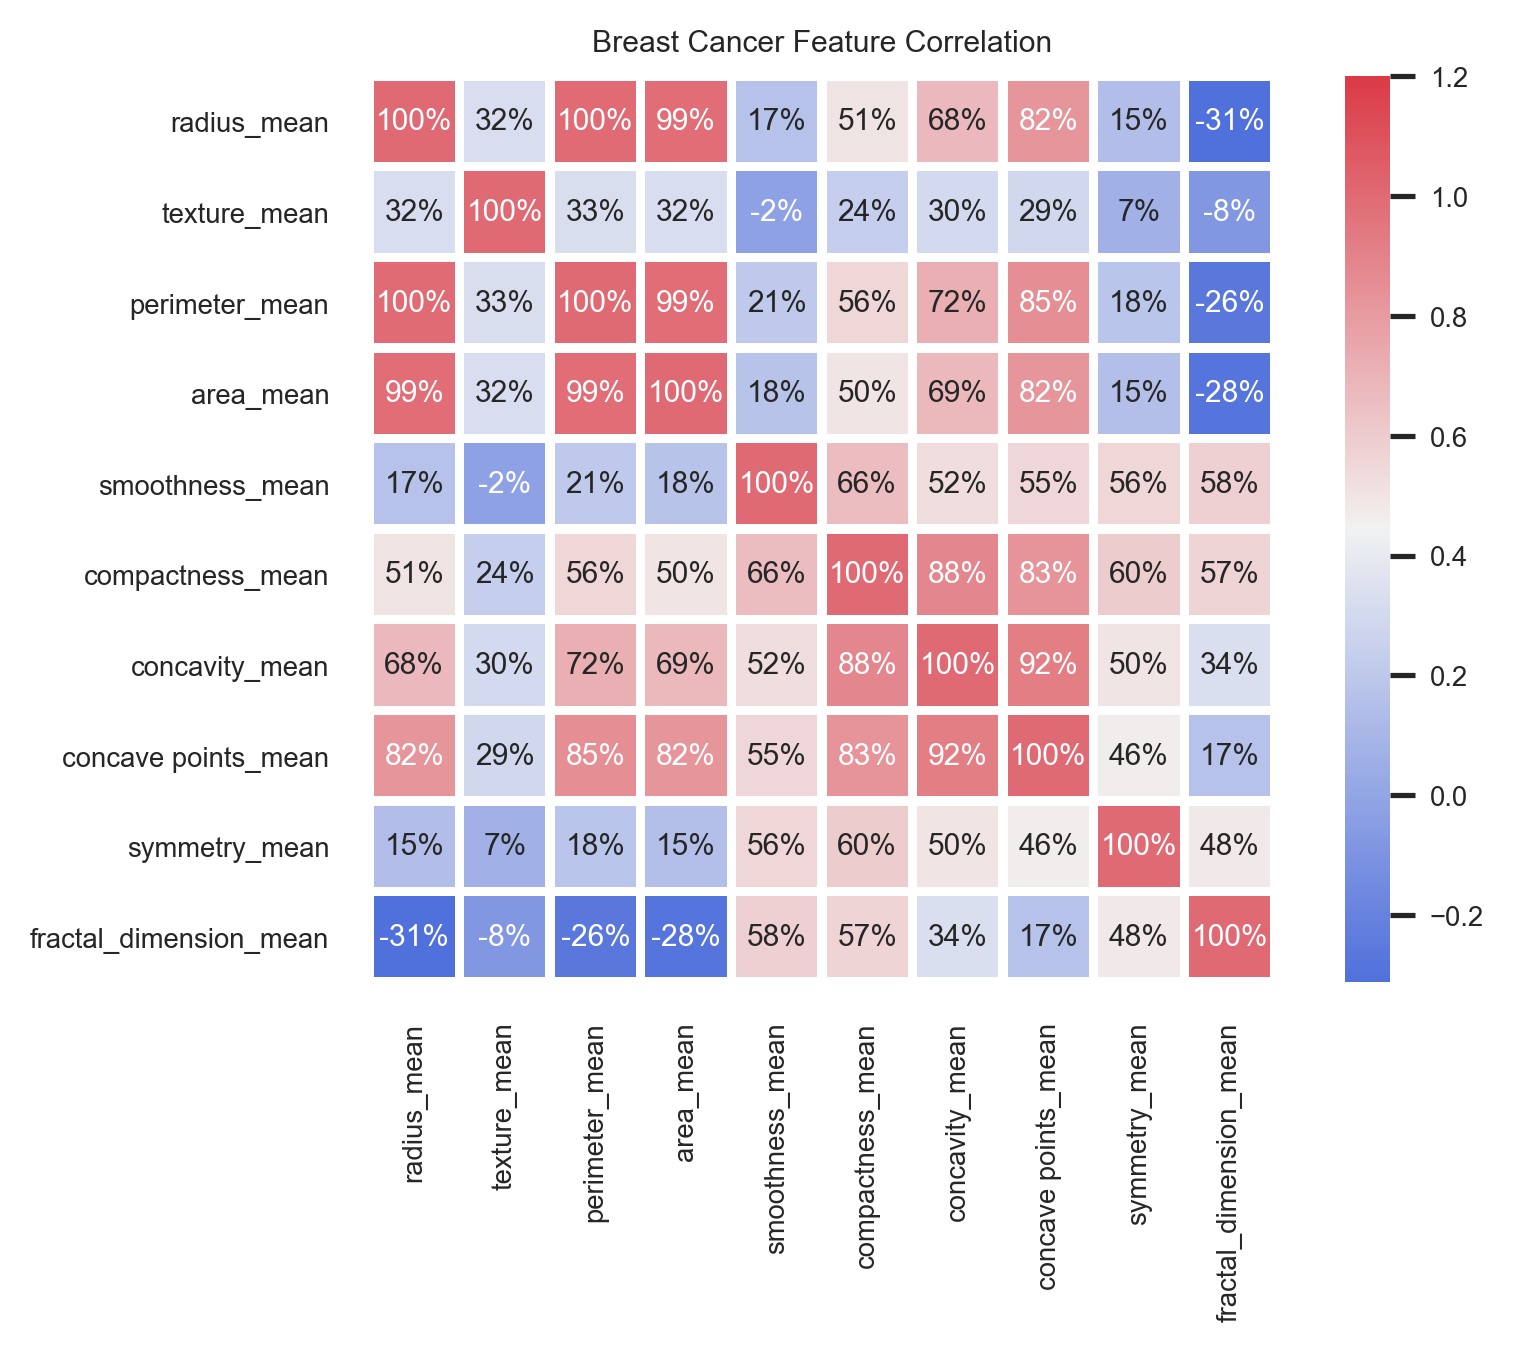

In [17]:
sns.set(font_scale=0.6)
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df_mean.corr(), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

**Observations:**
We can see strong positive relationship exists with mean values paramaters between 100%-75%;.

1) The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and perimeter

2) Some paramters are moderately positive correlated (between 50%-75%) like concavity and area, concavity and perimeter etc

3) Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, perimeter mean values.

# Pre-Processing the data

**Introduction**

Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:

-> Assigning numerical values to categorical data;

-> Handling missing values; and

-> Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

**Goal:**

Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

## Seperating target feature (i.e. diagnosis)

In [18]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,...,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,...,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,...,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,...,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,...,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,...,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,...,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,...,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,...,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

After encoding the class labels(diagnosis) in an array y, the **malignant tumors are now represented as class 1**(i.e prescence of cancer cells) and the **benign tumors are represented as class 0** (i.e no cancer cells detection), respectively.

# Scaling the data

Most machine learning and optimization algorithms behave much better if features are on the same scale.

In [21]:
scaler = MinMaxScaler()
features = scaler.fit_transform(X)
features

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

# Splitting data into train and test data

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

-> Split the available data into a training set and a testing set. (70% training, 30% test)

-> Train the algorithm on the first part,

-> make predictions on the second part and

-> evaluate the predictions against the expected results.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

# Predictive Model

## Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

print("Test accuracy: ",lr.score(X_test, y_test))
print("Train accuracy: ",lr.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Test accuracy:  0.9766081871345029
Train accuracy:  0.9673366834170855


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

**Accuracy of Logistic regression model is 98%, which is quite good.**

### Confusion Matrix of Logistic Regression Model

<AxesSubplot:>

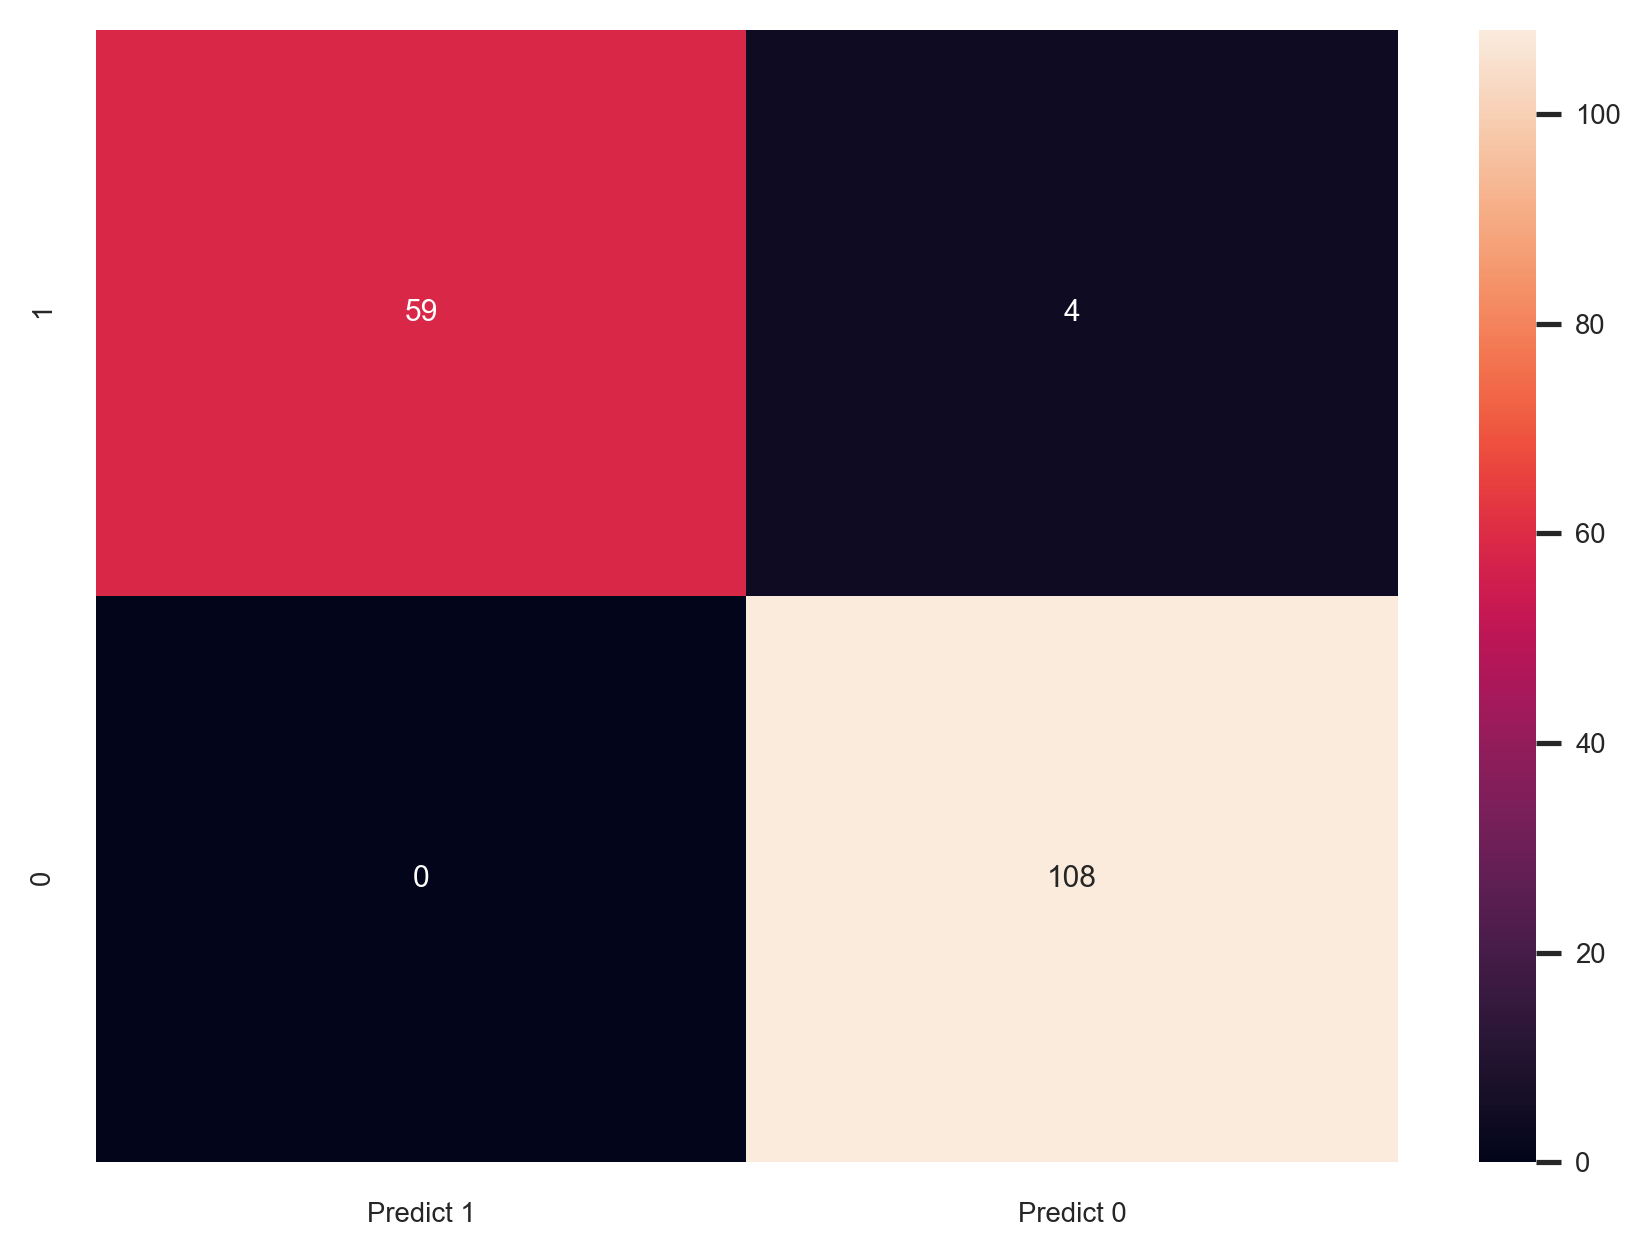

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Logistic Regression Model

**To decide which Model is best for our dataset, we check the AUC of all models. Model with good AUC score is the best model for our dataset.**

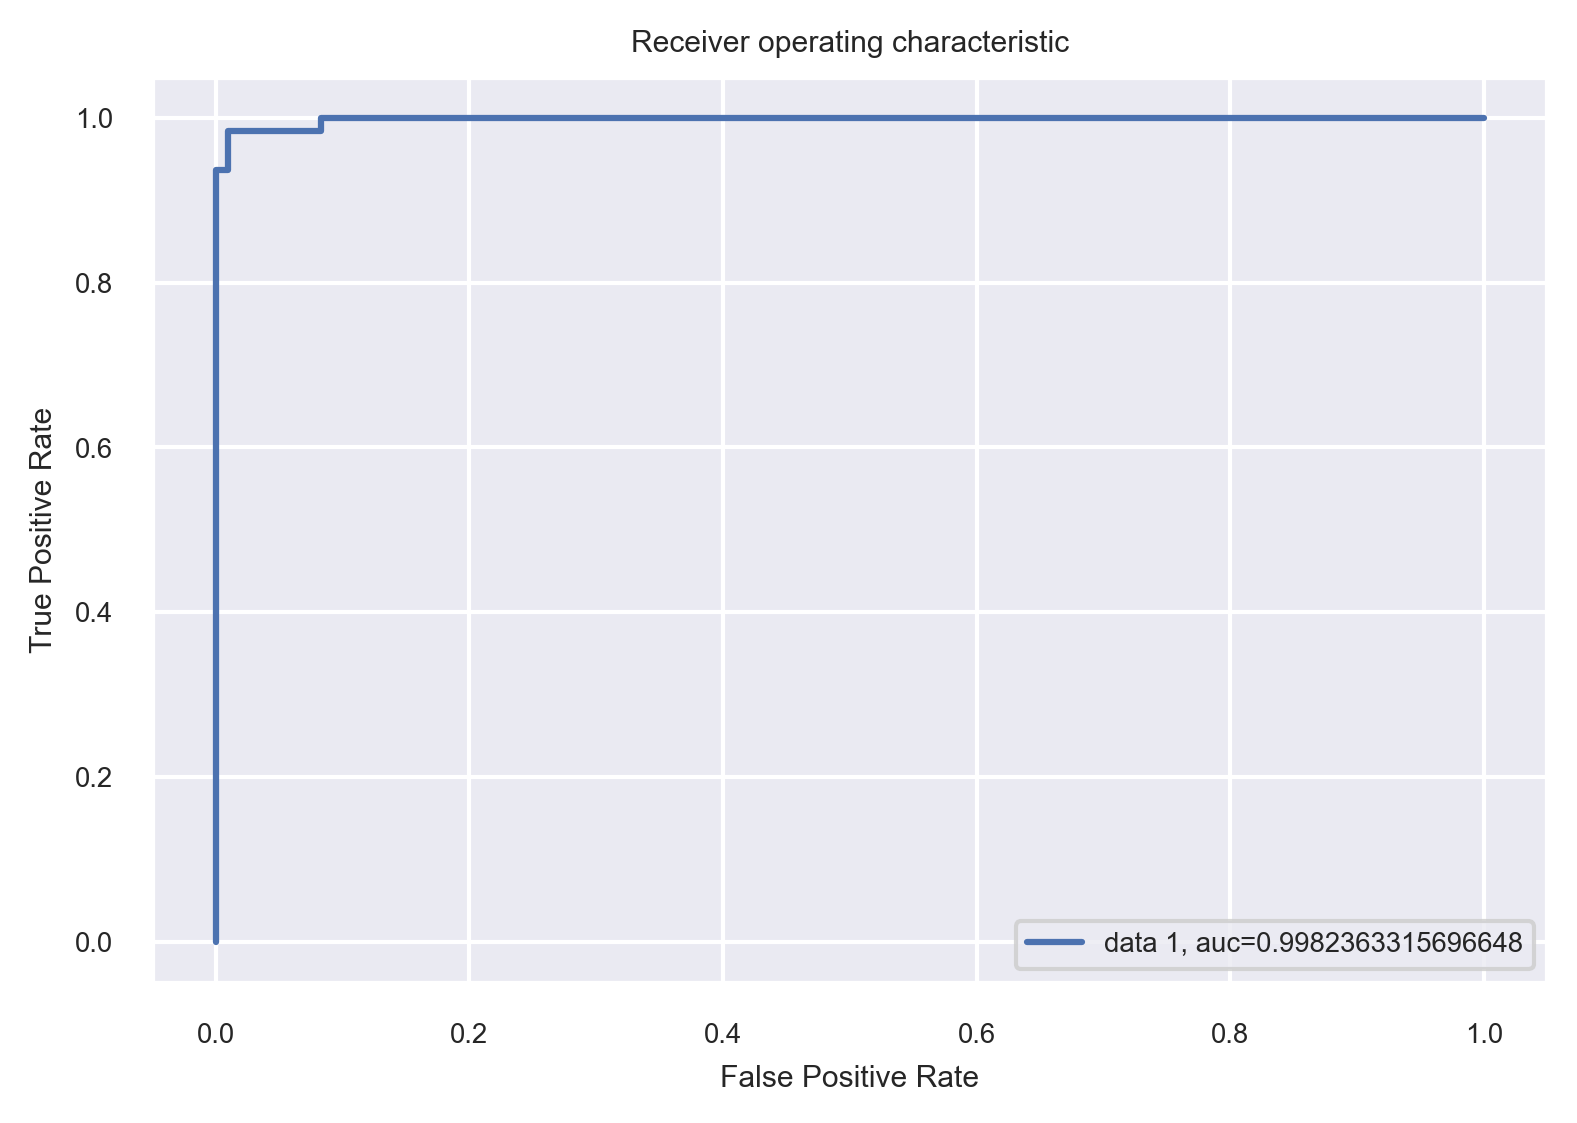

In [26]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of Logistic regression is 0.998, which is quite good enough.**

## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
dTree.fit(X_train, y_train)

print("Test accuracy: ",dTree.score(X_test, y_test))
print("Train accuracy: ",dTree.score(X_train,y_train))

Test accuracy:  0.9649122807017544
Train accuracy:  0.9698492462311558


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

In [28]:
y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Accuracy of Decision Tree classifier model is 96%.**

### Confusion Matrix of Decision Tree Model

<AxesSubplot:>

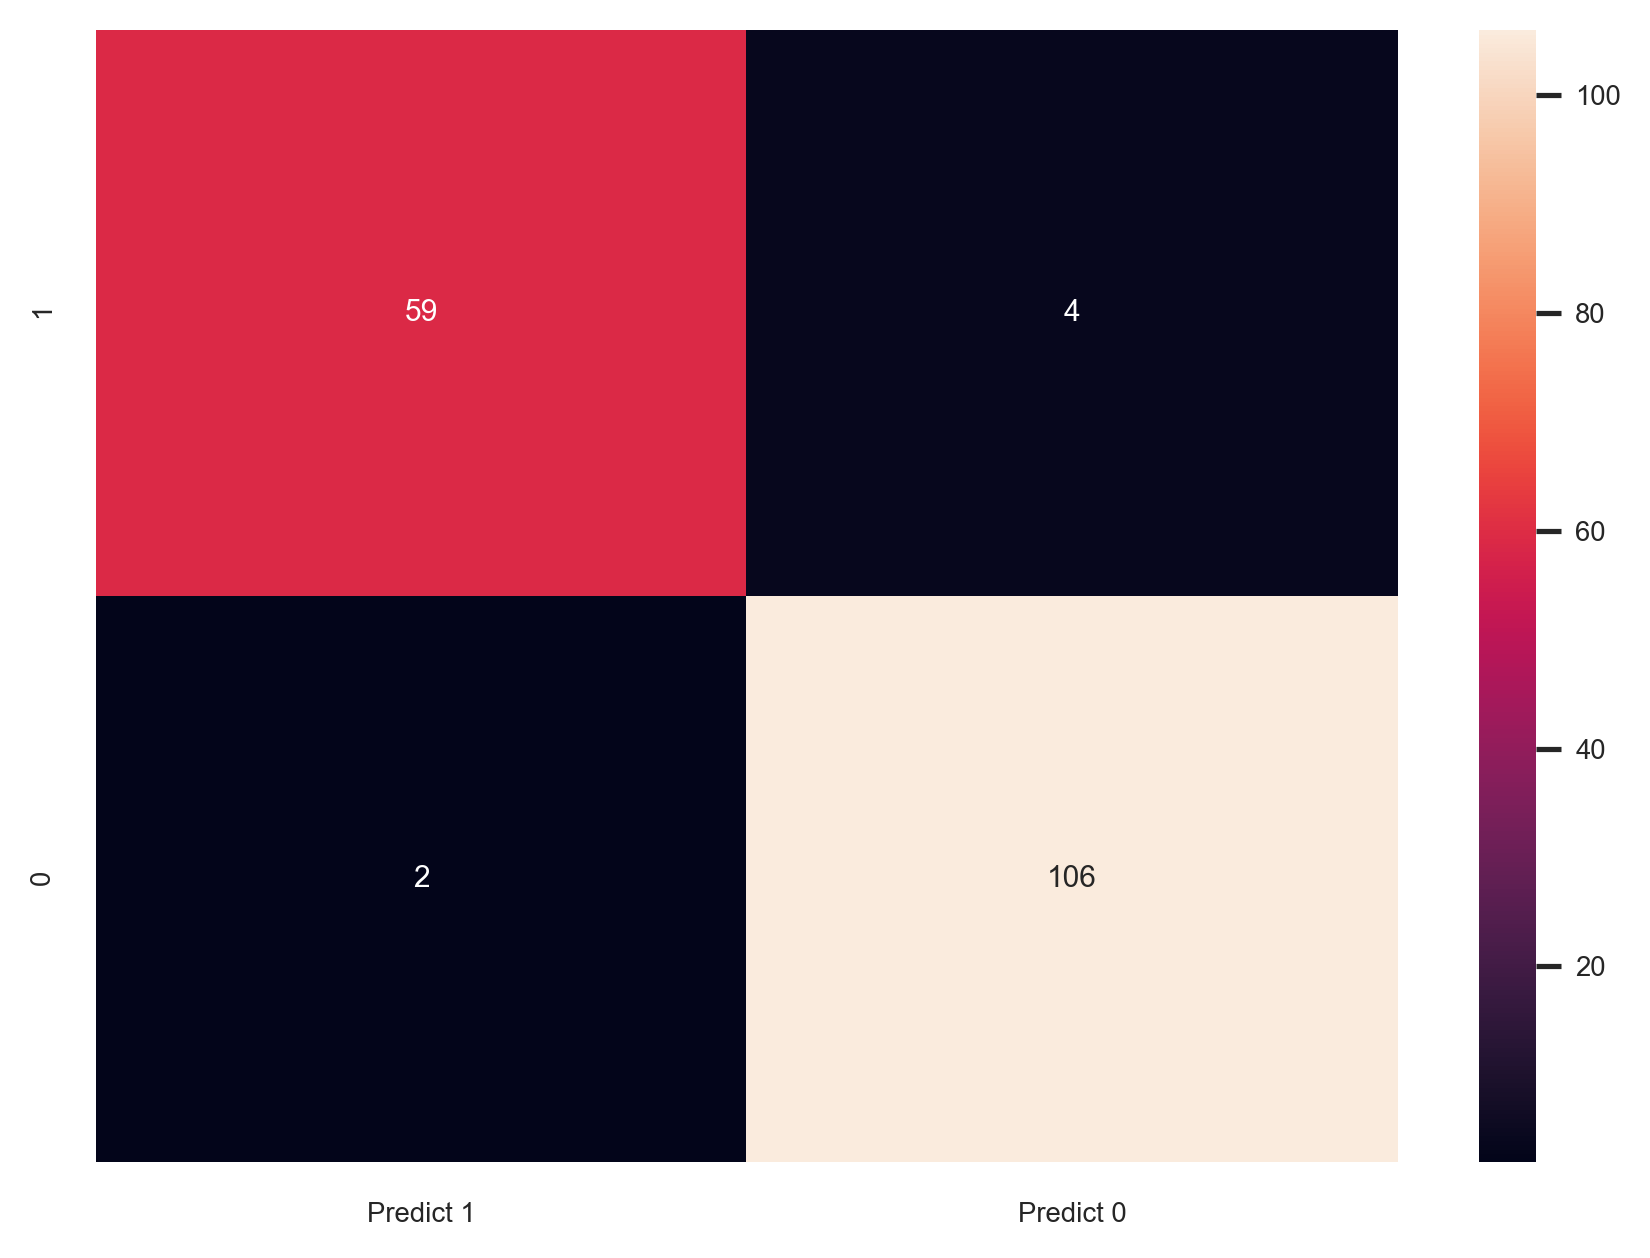

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Decision Tree Classifier Model

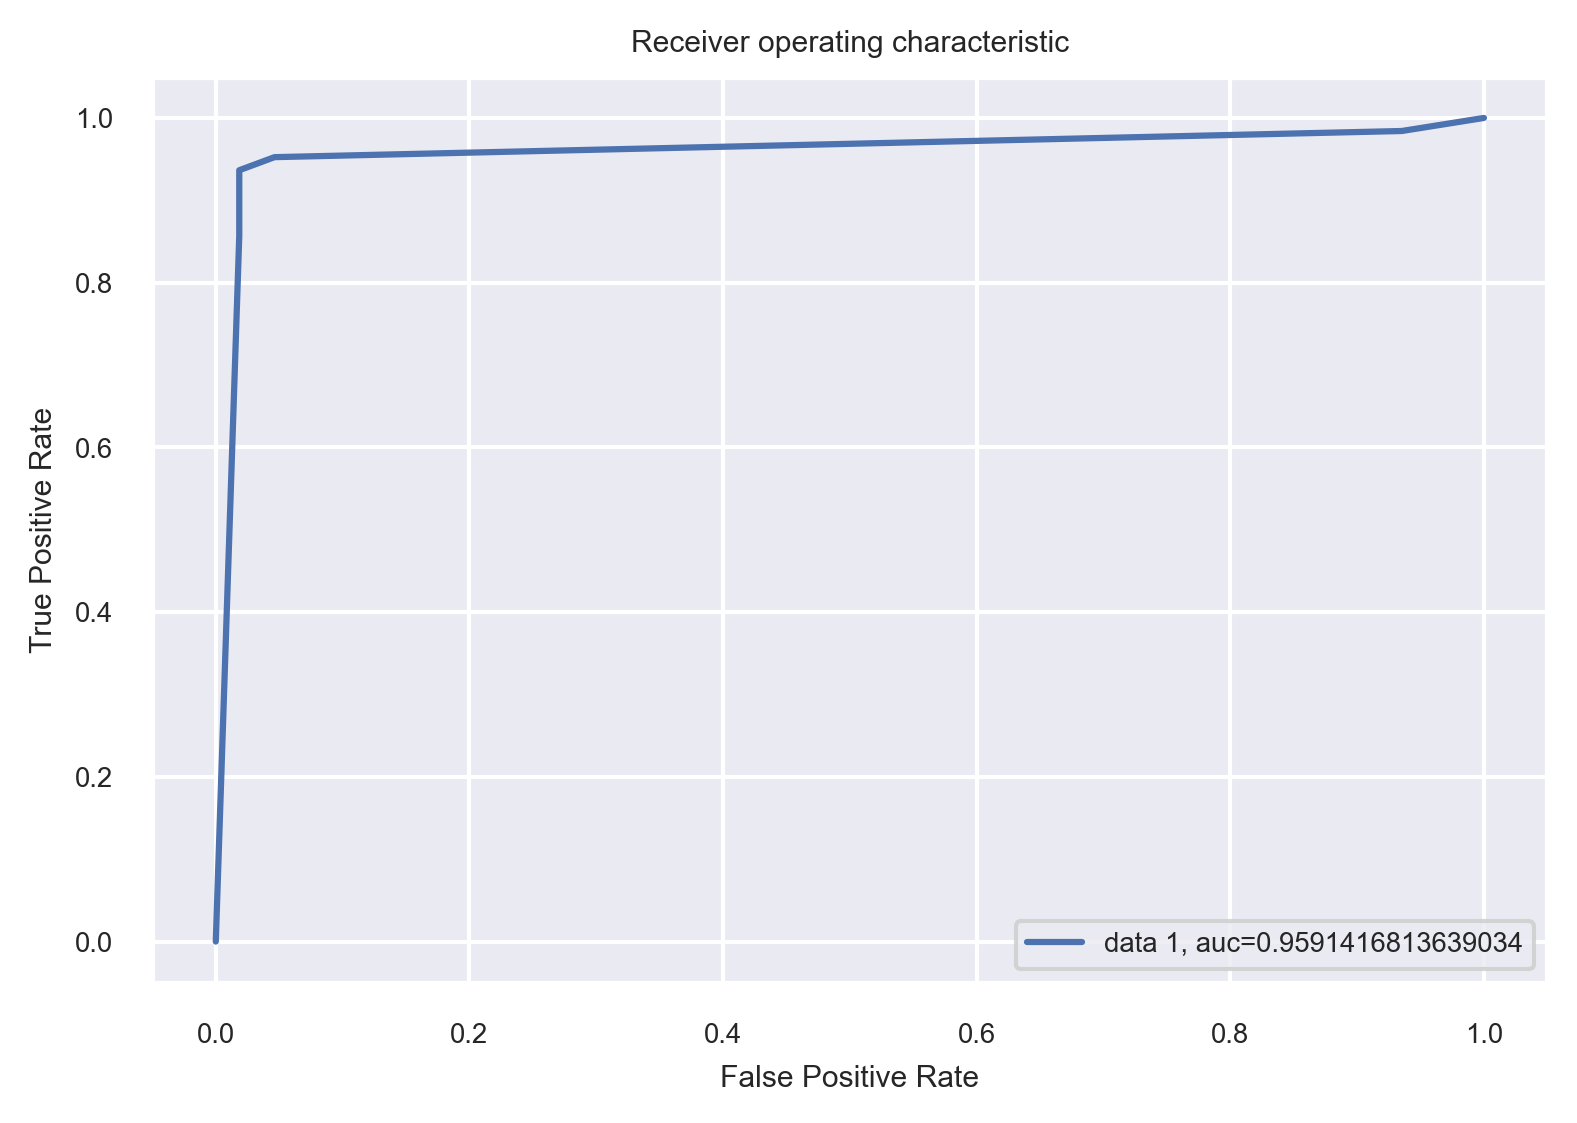

In [30]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of Decision Tree classifier model is 0.959.**

## Ensemble learning - Bagging

In [31]:
bgcl = BaggingClassifier(n_estimators = 100, base_estimator=dTree, random_state=42)

bgcl = bgcl.fit(X_train, y_train)

In [32]:
y_pred_bag = bgcl.predict(X_test)

print("Test accuracy: ",bgcl.score(X_test, y_test))
print("Train accuracy: ",bgcl.score(X_train,y_train))

Test accuracy:  0.9590643274853801
Train accuracy:  0.9824120603015075


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

In [33]:
print(metrics.classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**Accuracy of Bagging model is 96%.**

### Confusion Matrix of Bagging Model

<AxesSubplot:>

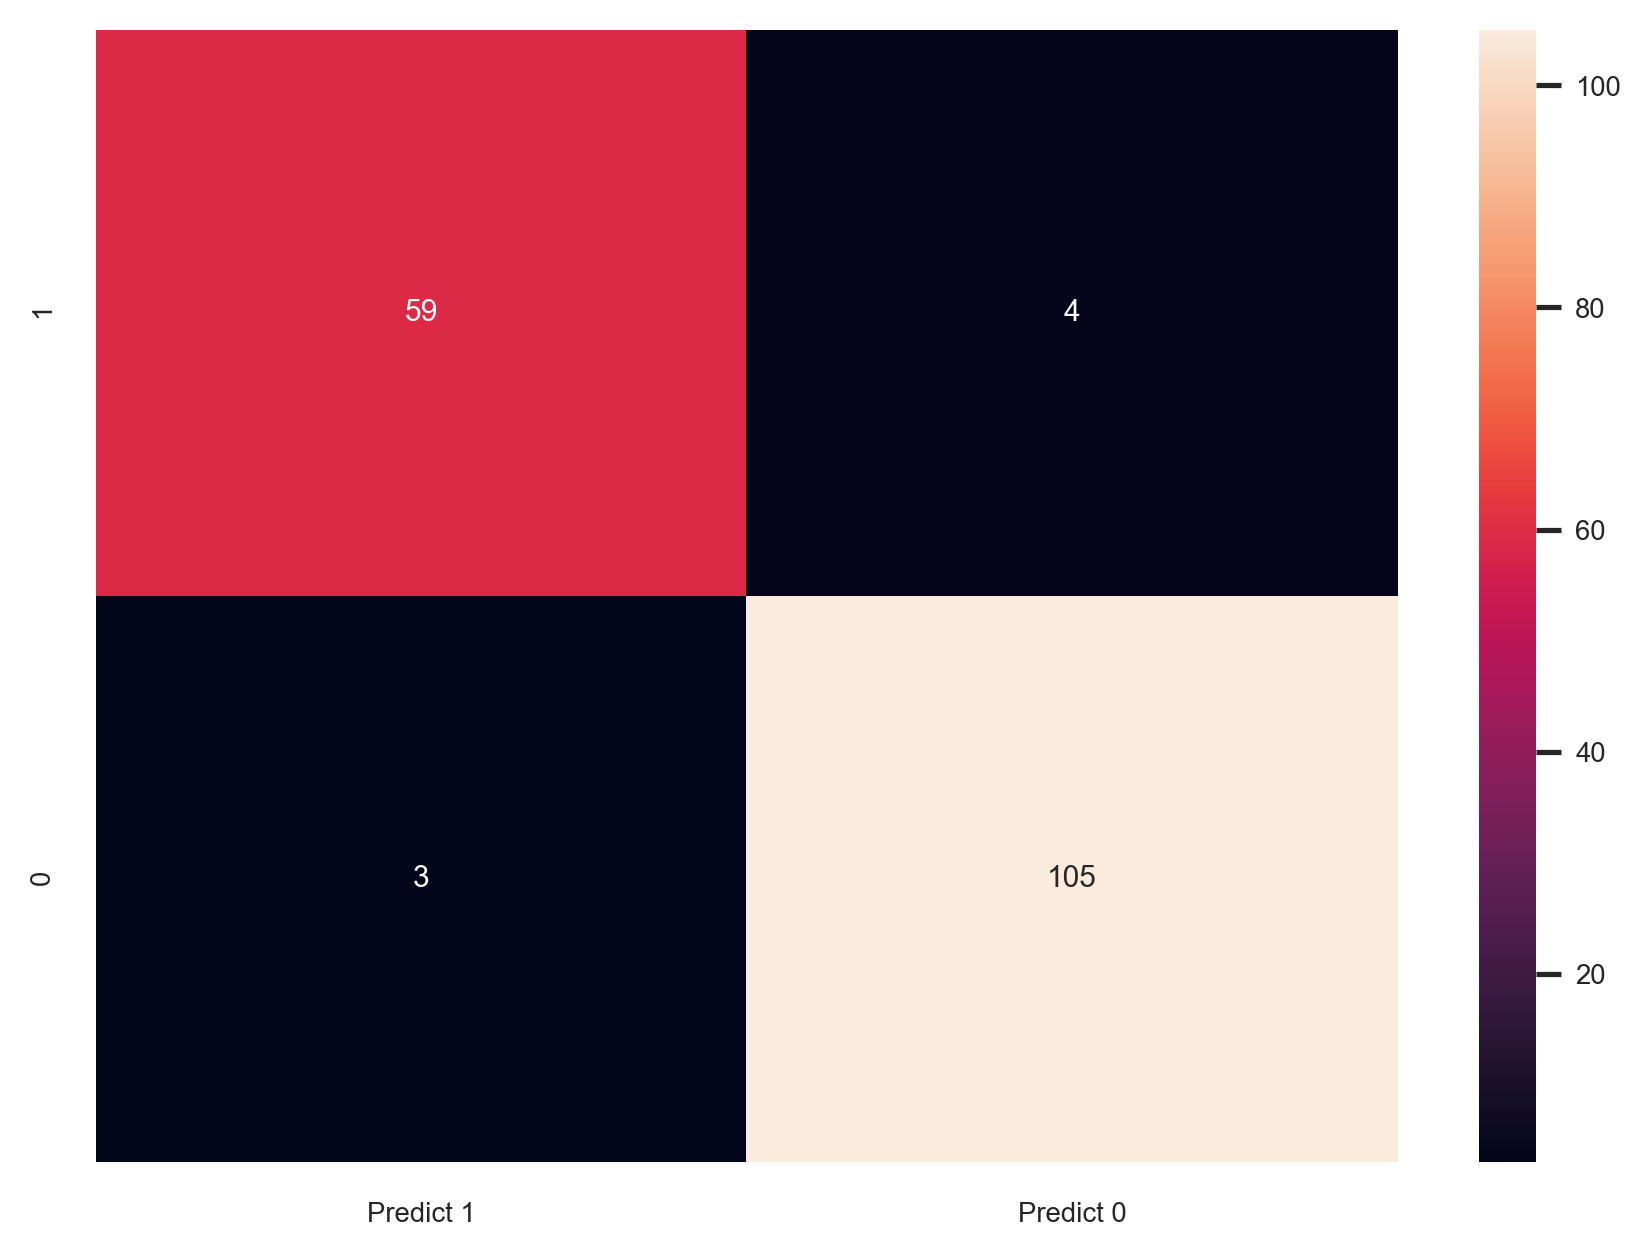

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_bag, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Bagging Model

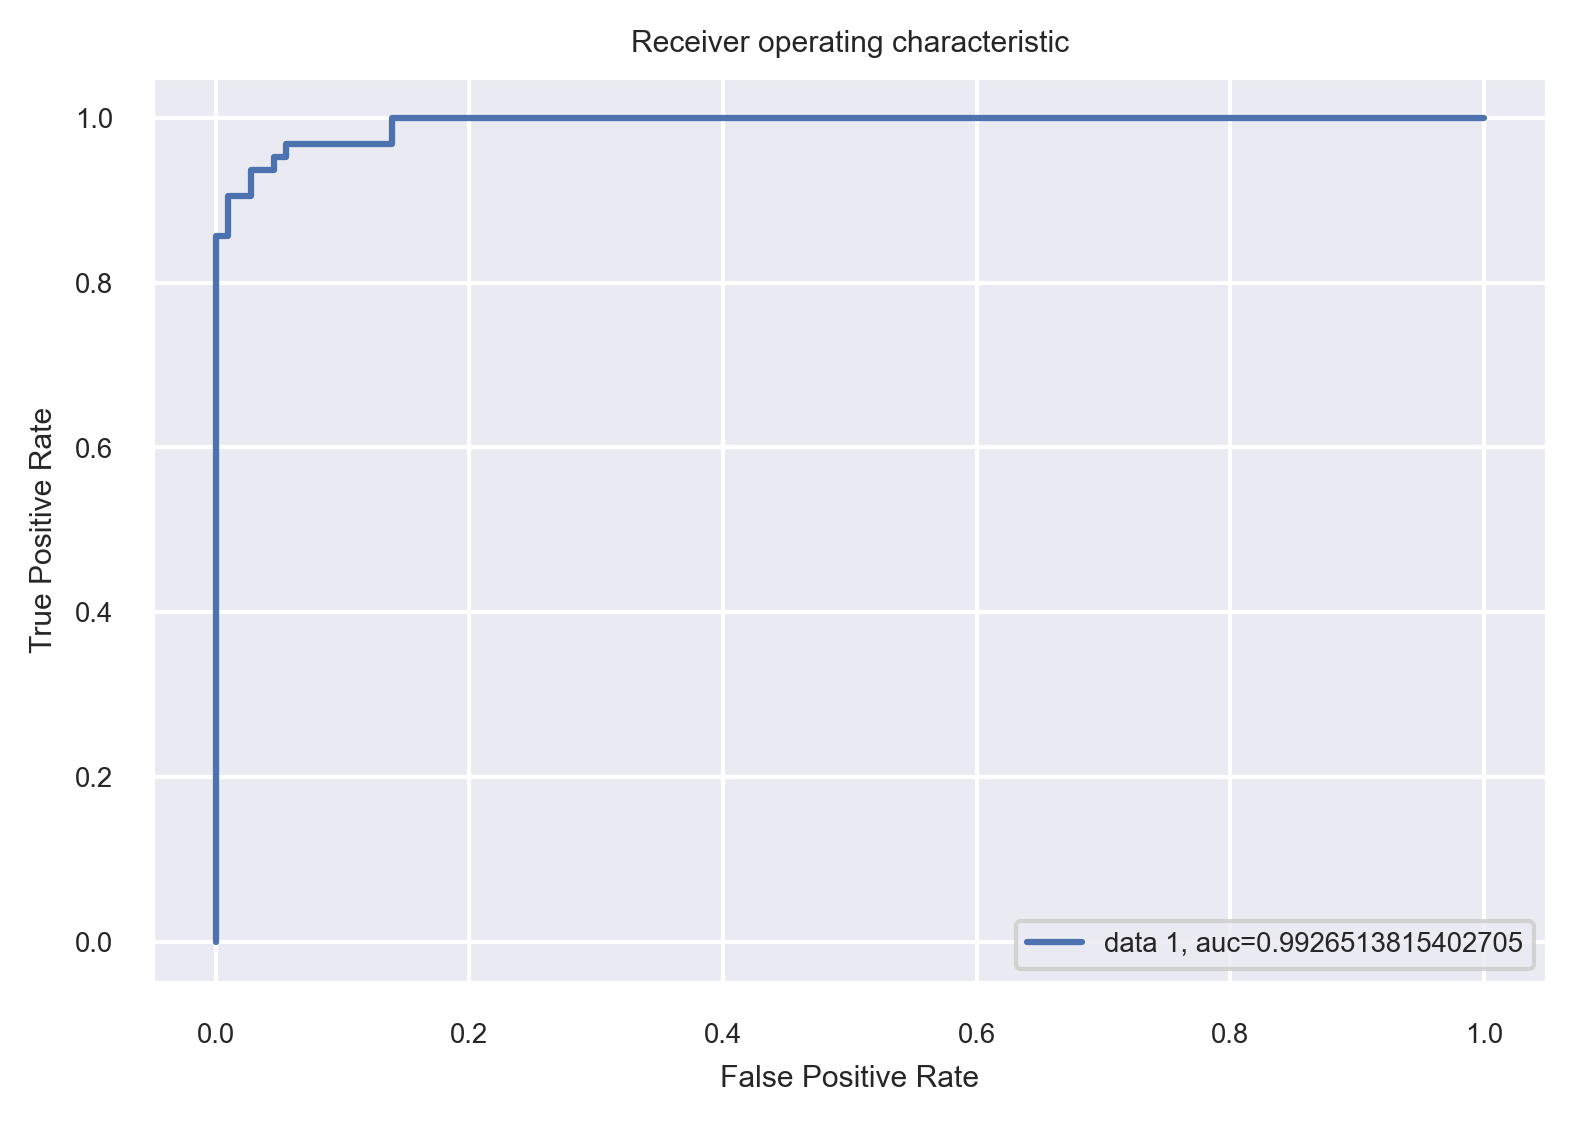

In [35]:
y_pred_proba = bgcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of Bagging model is 0.993**

## Ensemble learning - AdaBoosting

In [36]:
abcl = AdaBoostClassifier(n_estimators=45, random_state=42)
abcl = abcl.fit(X_train, y_train)

In [37]:
y_pred_abcl = abcl.predict(X_test)

print("Test accuracy: ",abcl.score(X_test, y_test))
print("Train accuracy: ",abcl.score(X_train,y_train))

Test accuracy:  0.9766081871345029
Train accuracy:  1.0


In [38]:
print(metrics.classification_report(y_test, y_pred_abcl))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**Accuracy of AdaBoost model is 98%**

### Confusion Matrix of AdaBoost Model

<AxesSubplot:>

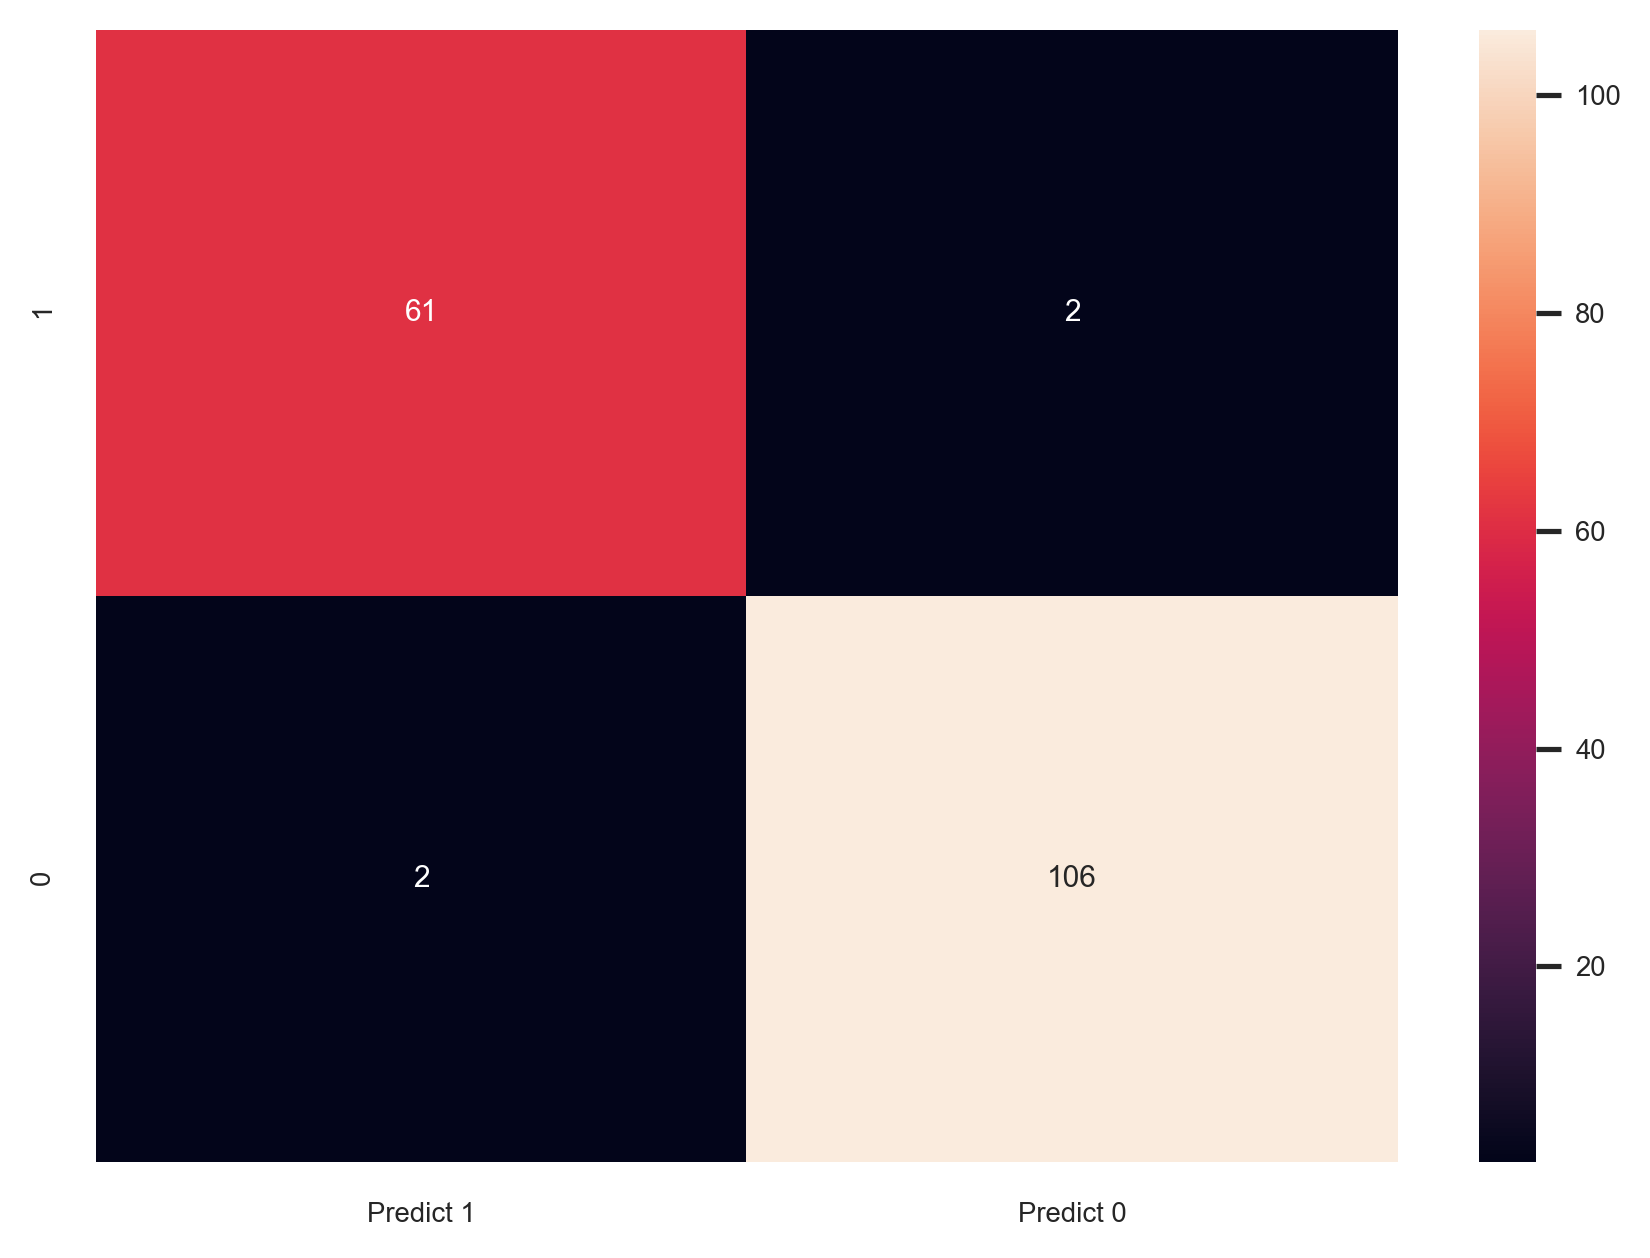

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred_abcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of AdaBoost model

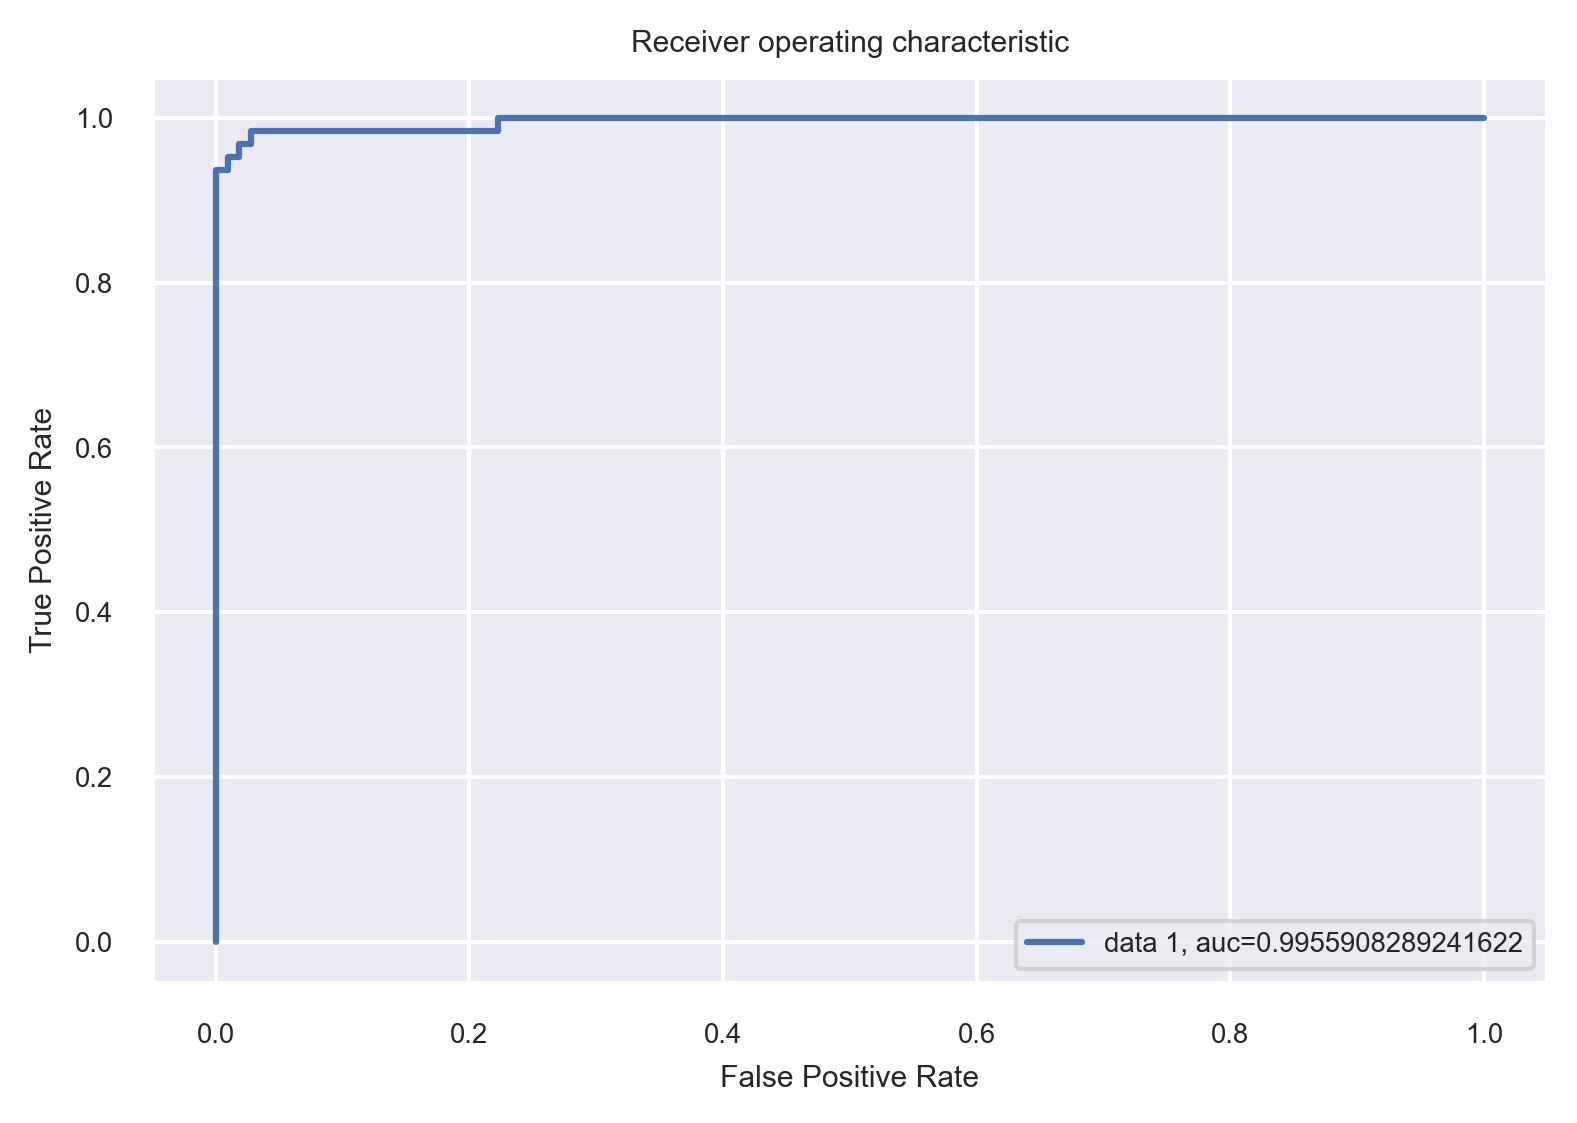

In [40]:
y_pred_proba = abcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of AdaBoost is 0.996**

## Ensemble RandomForest Classifier

In [41]:
print(len(X.columns))
print(round(len(X.columns)**0.5,1))

30
5.5


Hence max_feature must be range from 5.5 means approximate 6 to any number like 9

In [42]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=6)
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print("Test accuracy: ",rfcl.score(X_test, y_test))
print("Train accuracy: ",rfcl.score(X_train,y_train))

Test accuracy:  0.9649122807017544
Train accuracy:  0.9974874371859297


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

In [43]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Accuracy of Random Forest Classifier model is 96%**

### Confusion Matrix of Random Forest Classifier Model

<AxesSubplot:>

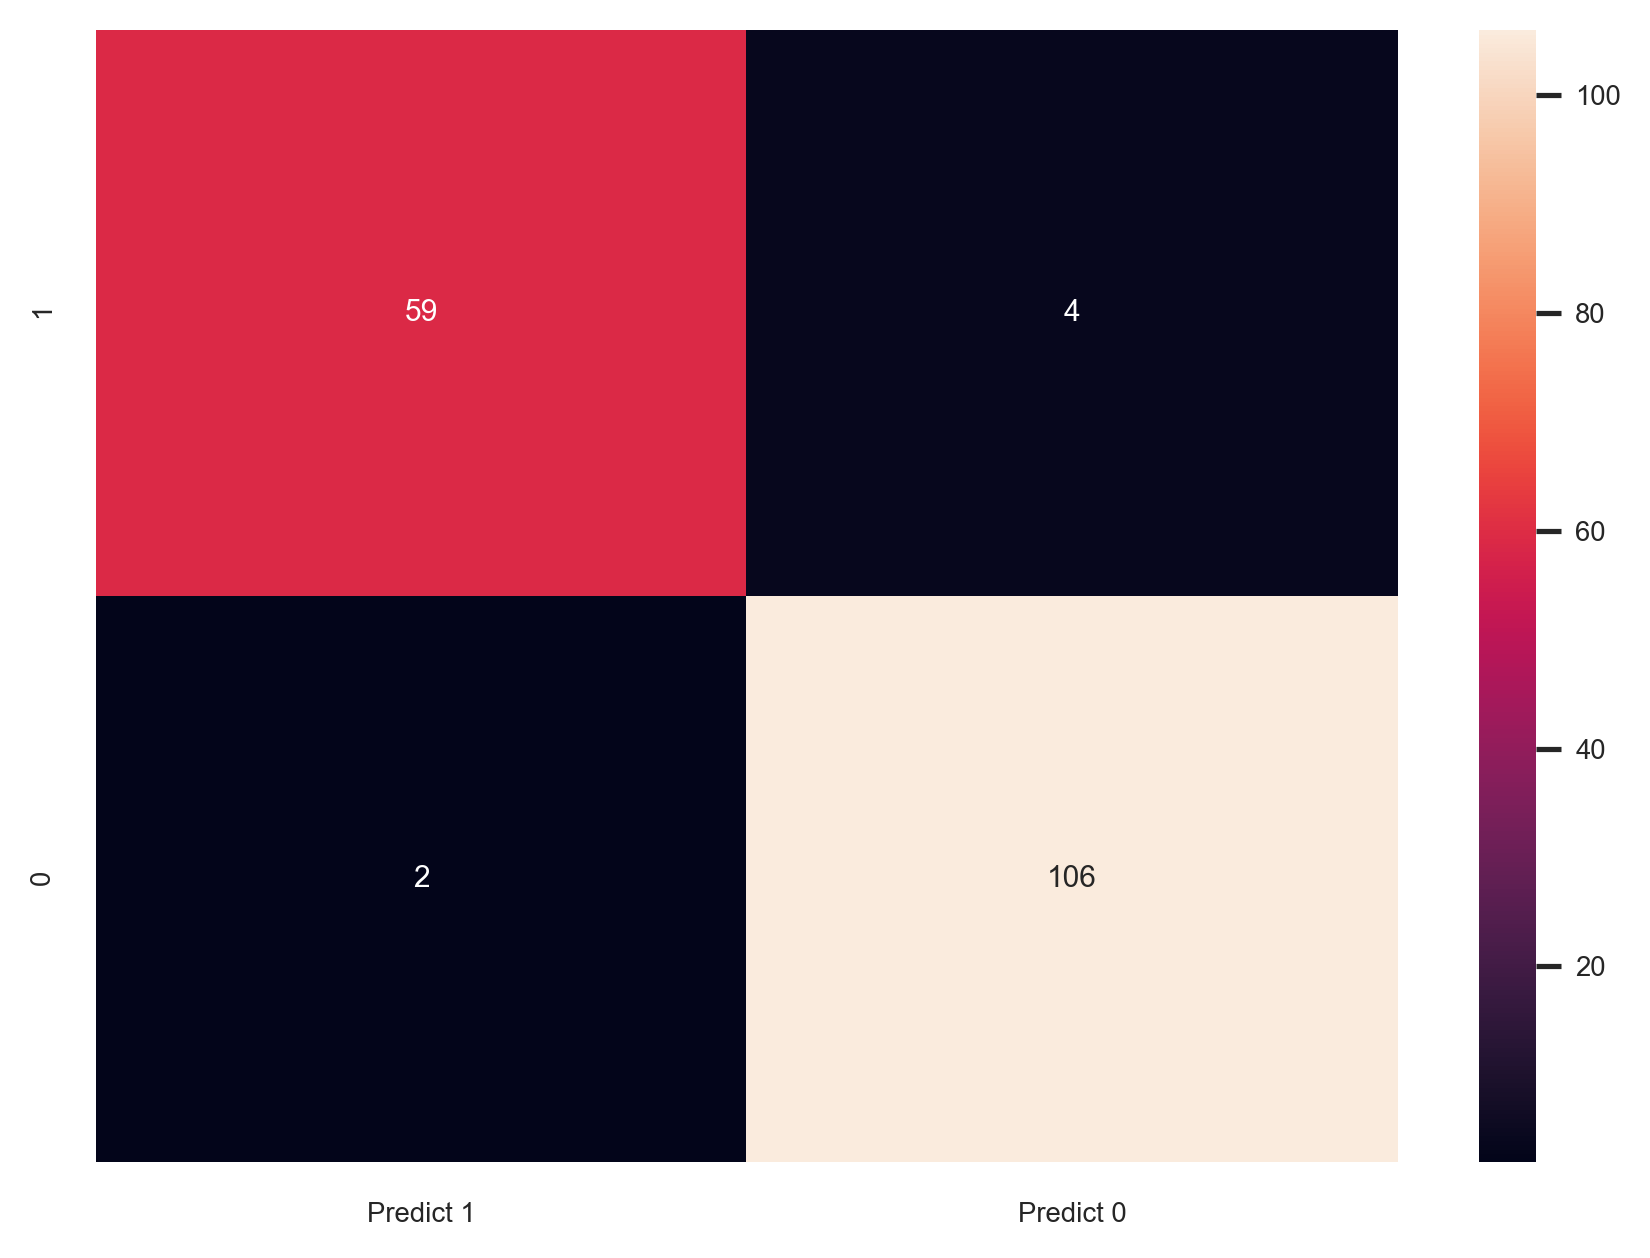

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Random Forest Classifier

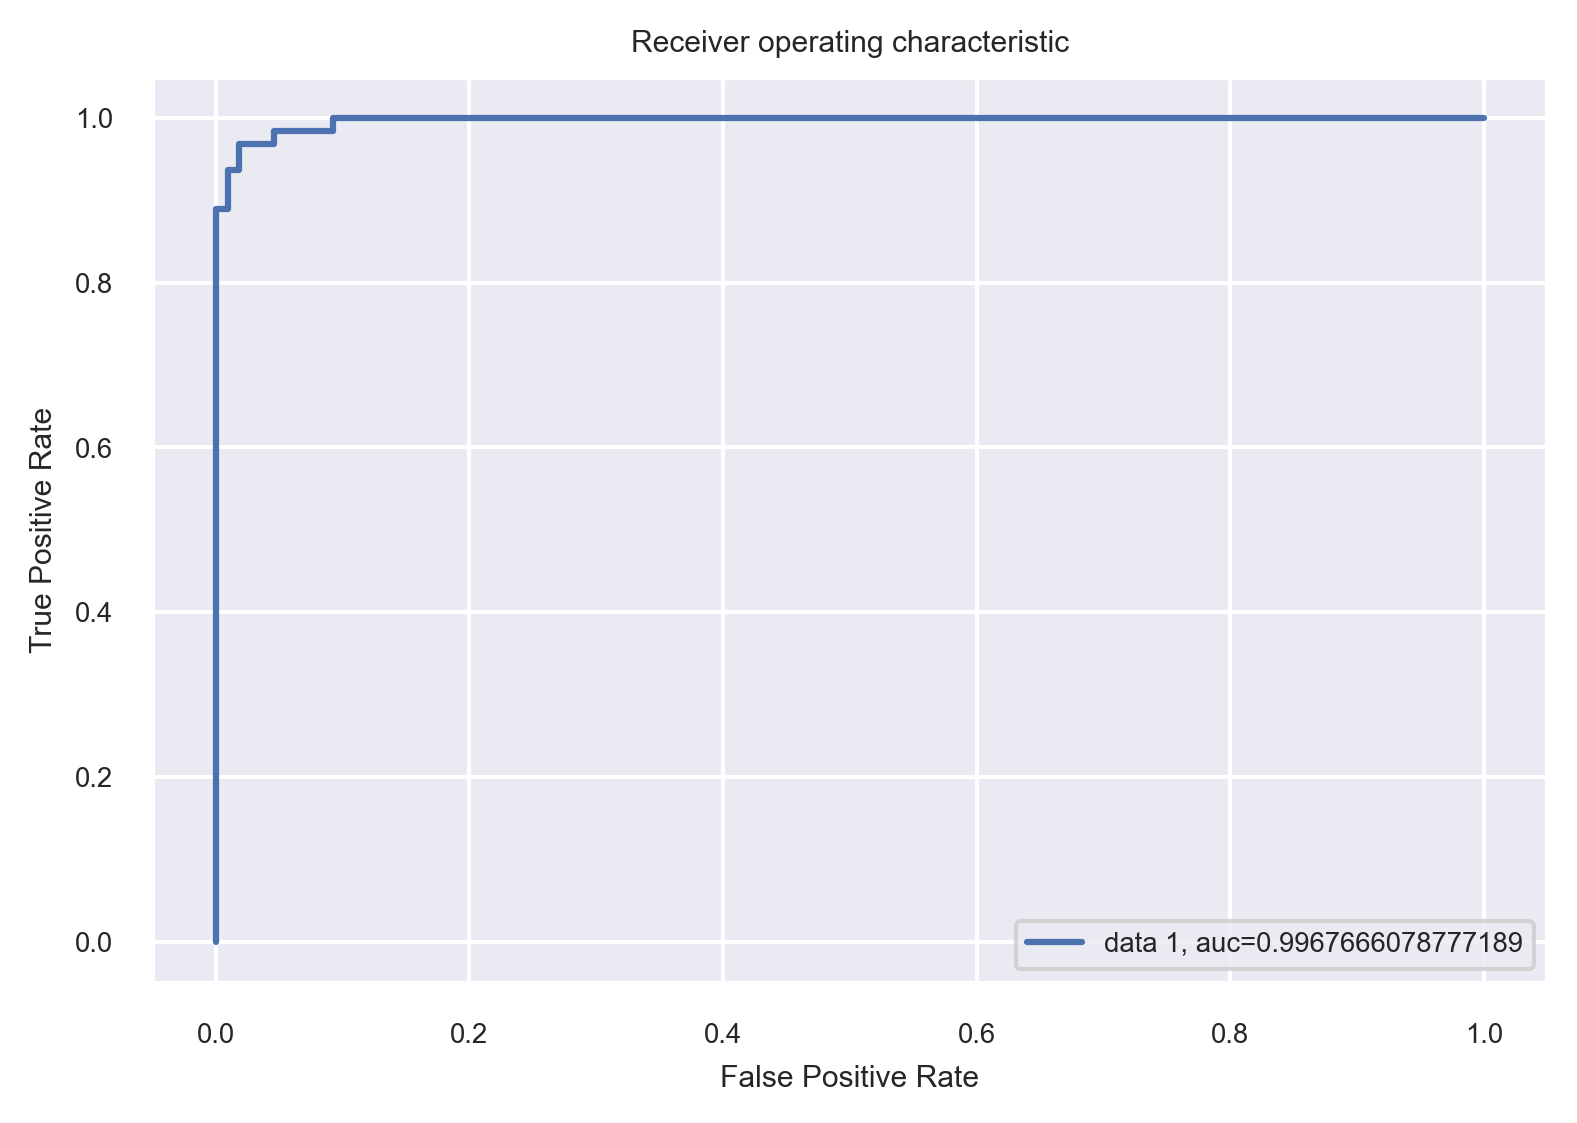

In [45]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of Random Forest Classifier is 0.997**

## kNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("Test accuracy: ",knn.score(X_test, y_test))
print("Train accuracy: ",knn.score(X_train,y_train))

Test accuracy:  0.9649122807017544
Train accuracy:  0.9798994974874372


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

In [47]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Accuracy of kNN Model is 96%**

### Confusion Matrix of kNN

<AxesSubplot:>

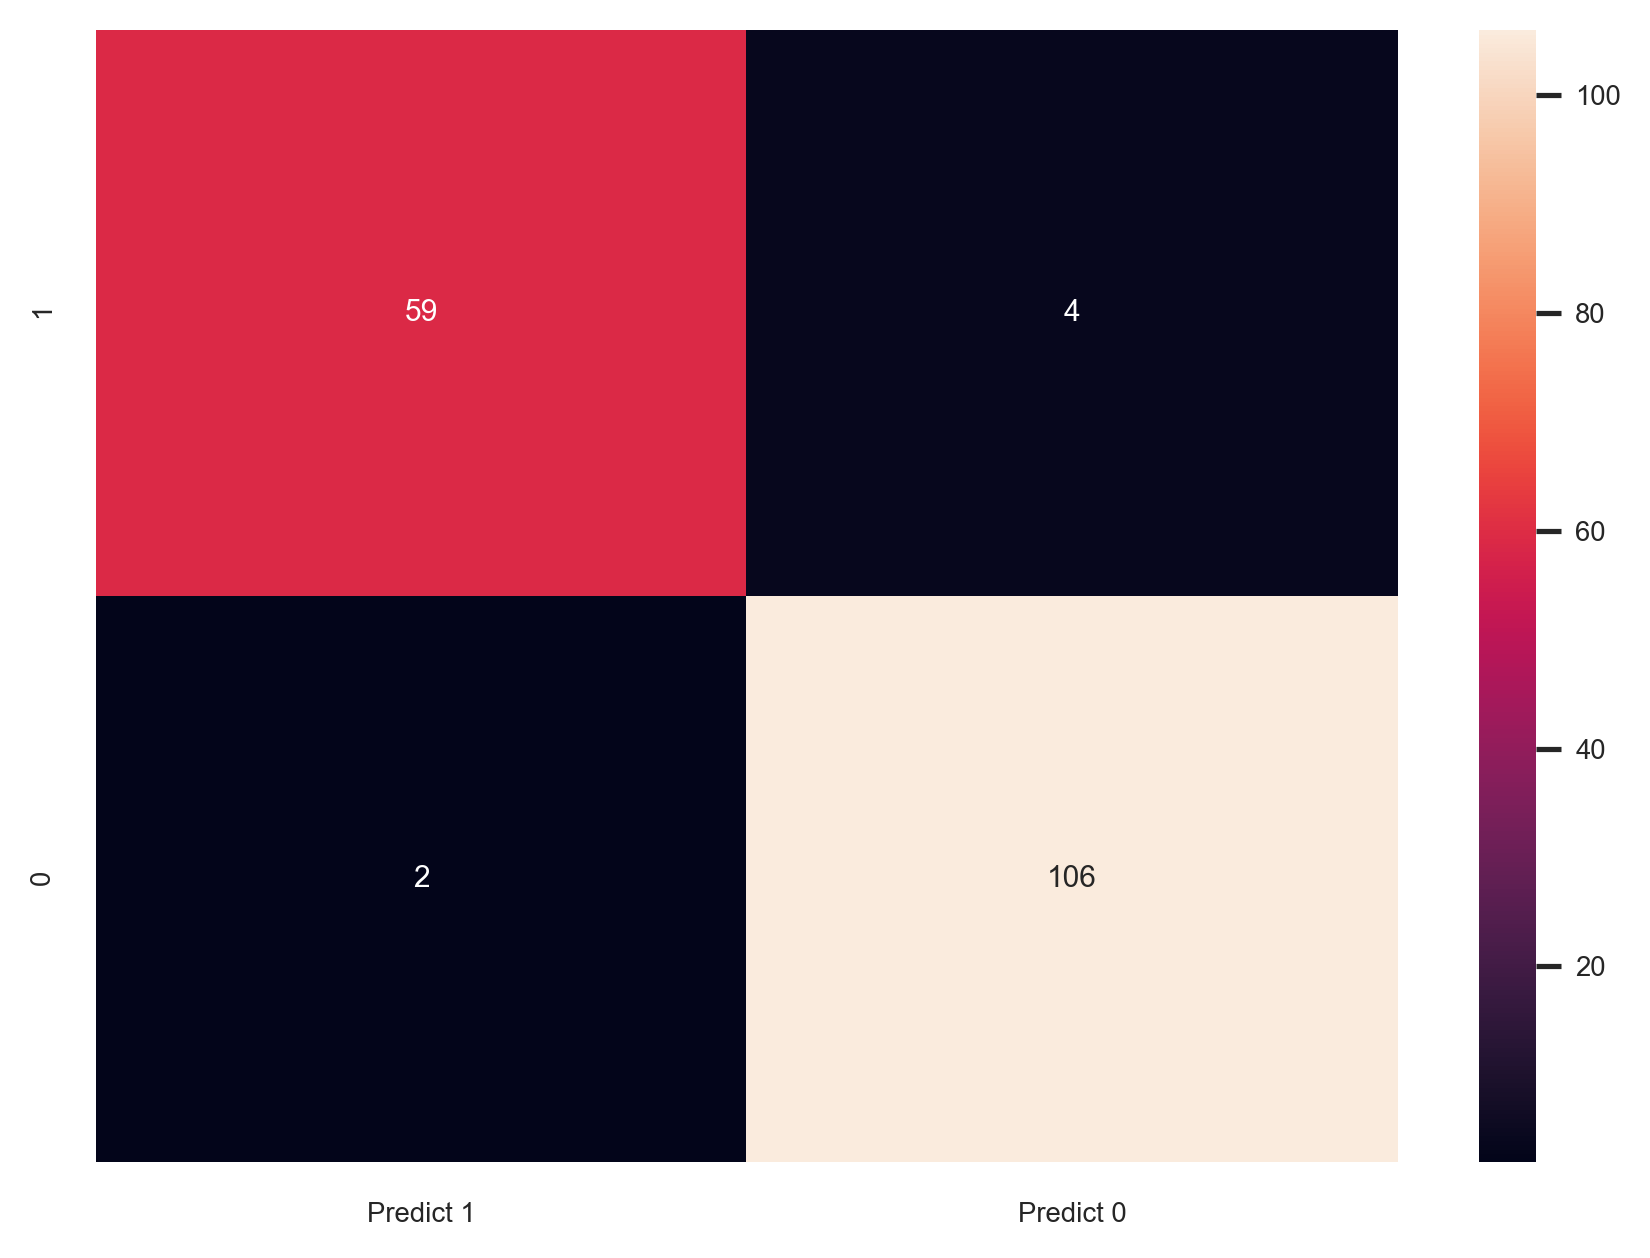

In [48]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of kNN

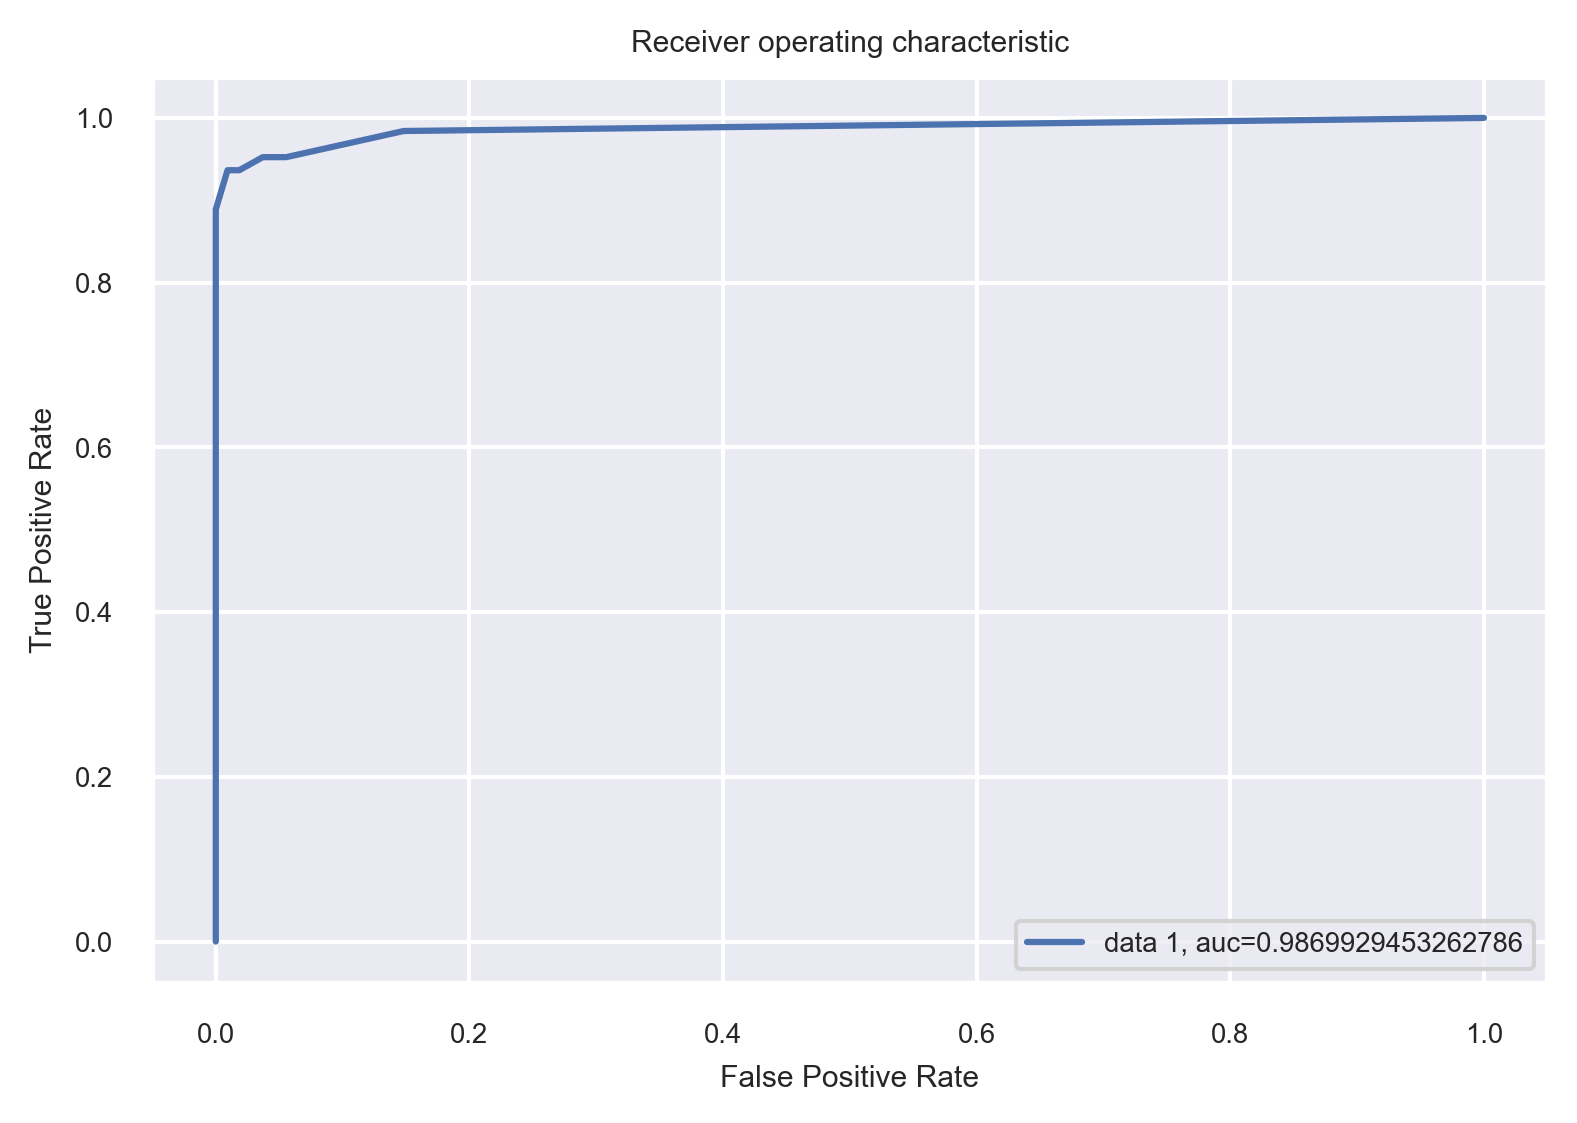

In [49]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of kNN is 0.987**

## XGBoost

In [50]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

[09:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred_xgb = xgb.predict(X_test)

print("Test accuracy: ",xgb.score(X_test, y_test))
print("Train accuracy: ",xgb.score(X_train,y_train))

Test accuracy:  0.9824561403508771
Train accuracy:  1.0


In [52]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**Accuracy of XGBoost Model is 98%**

### Confusion Matrix of XGBoost Model

<AxesSubplot:>

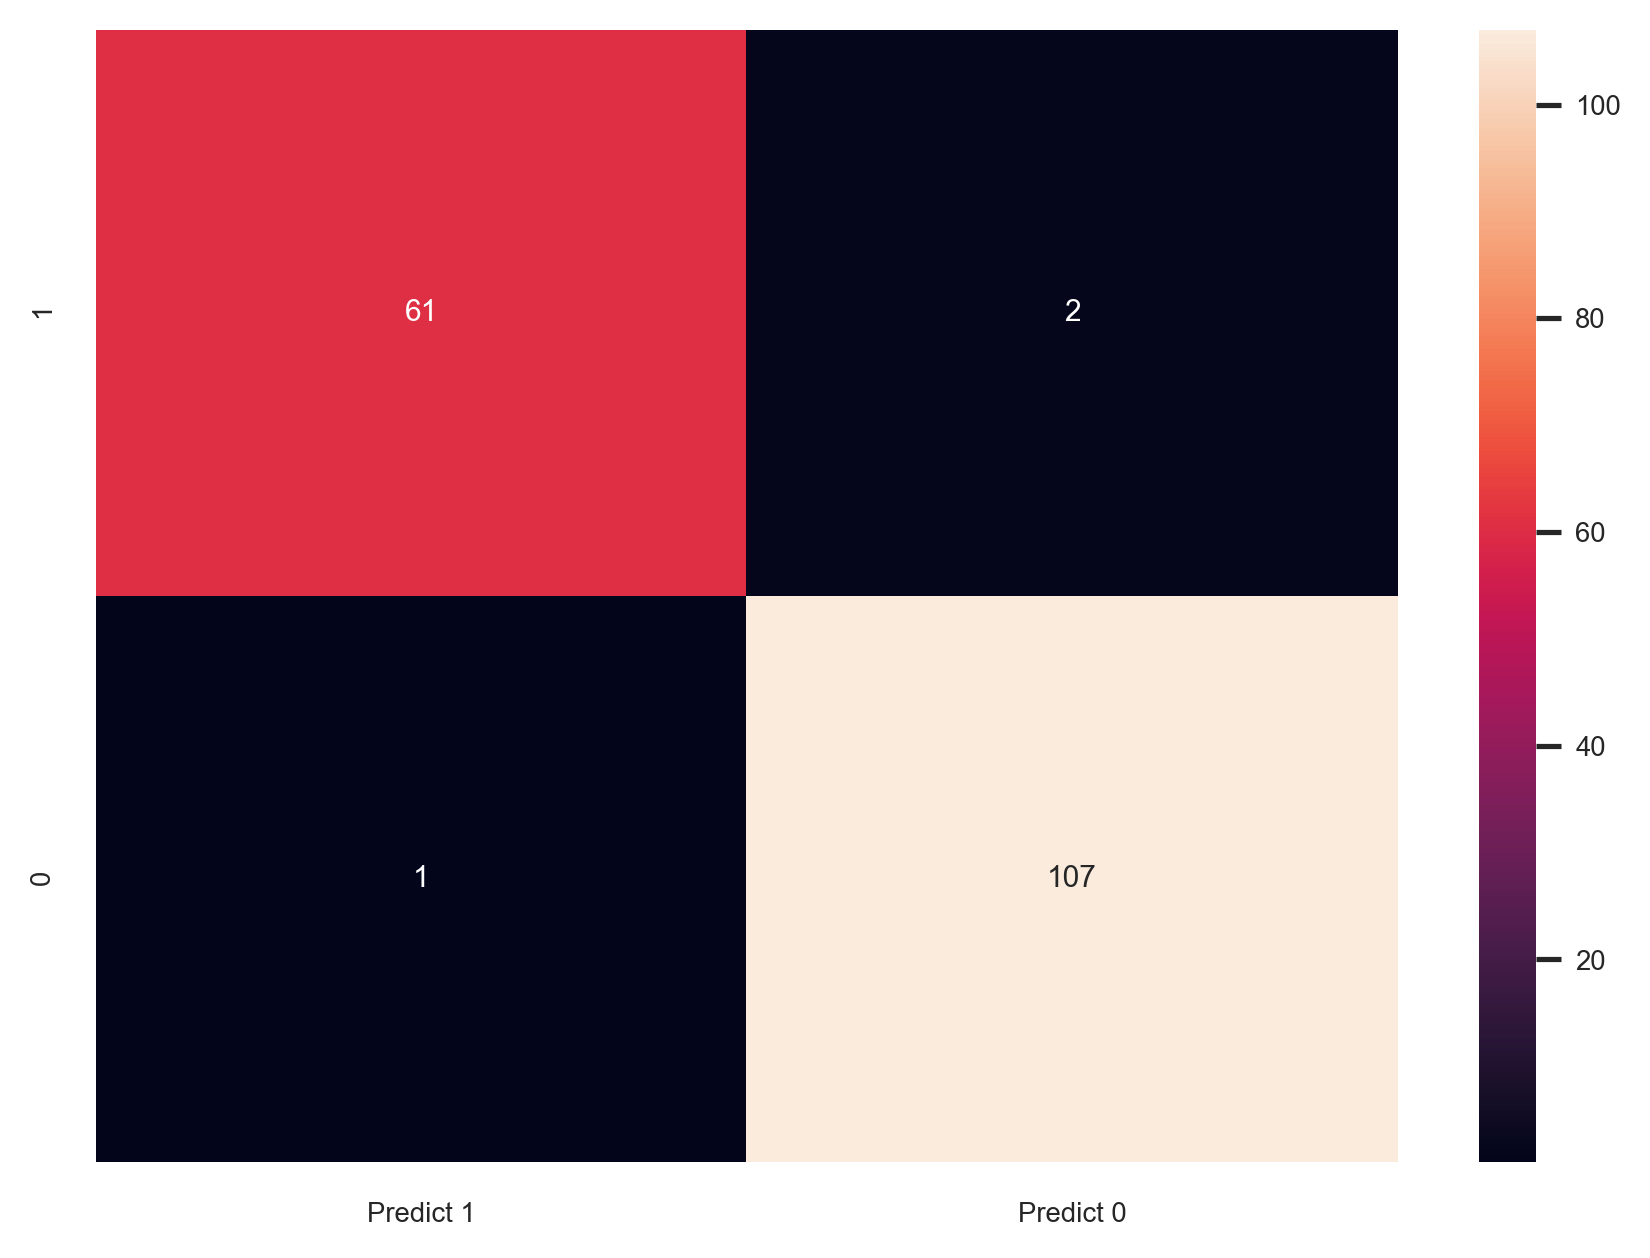

In [53]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of XGBoost Model

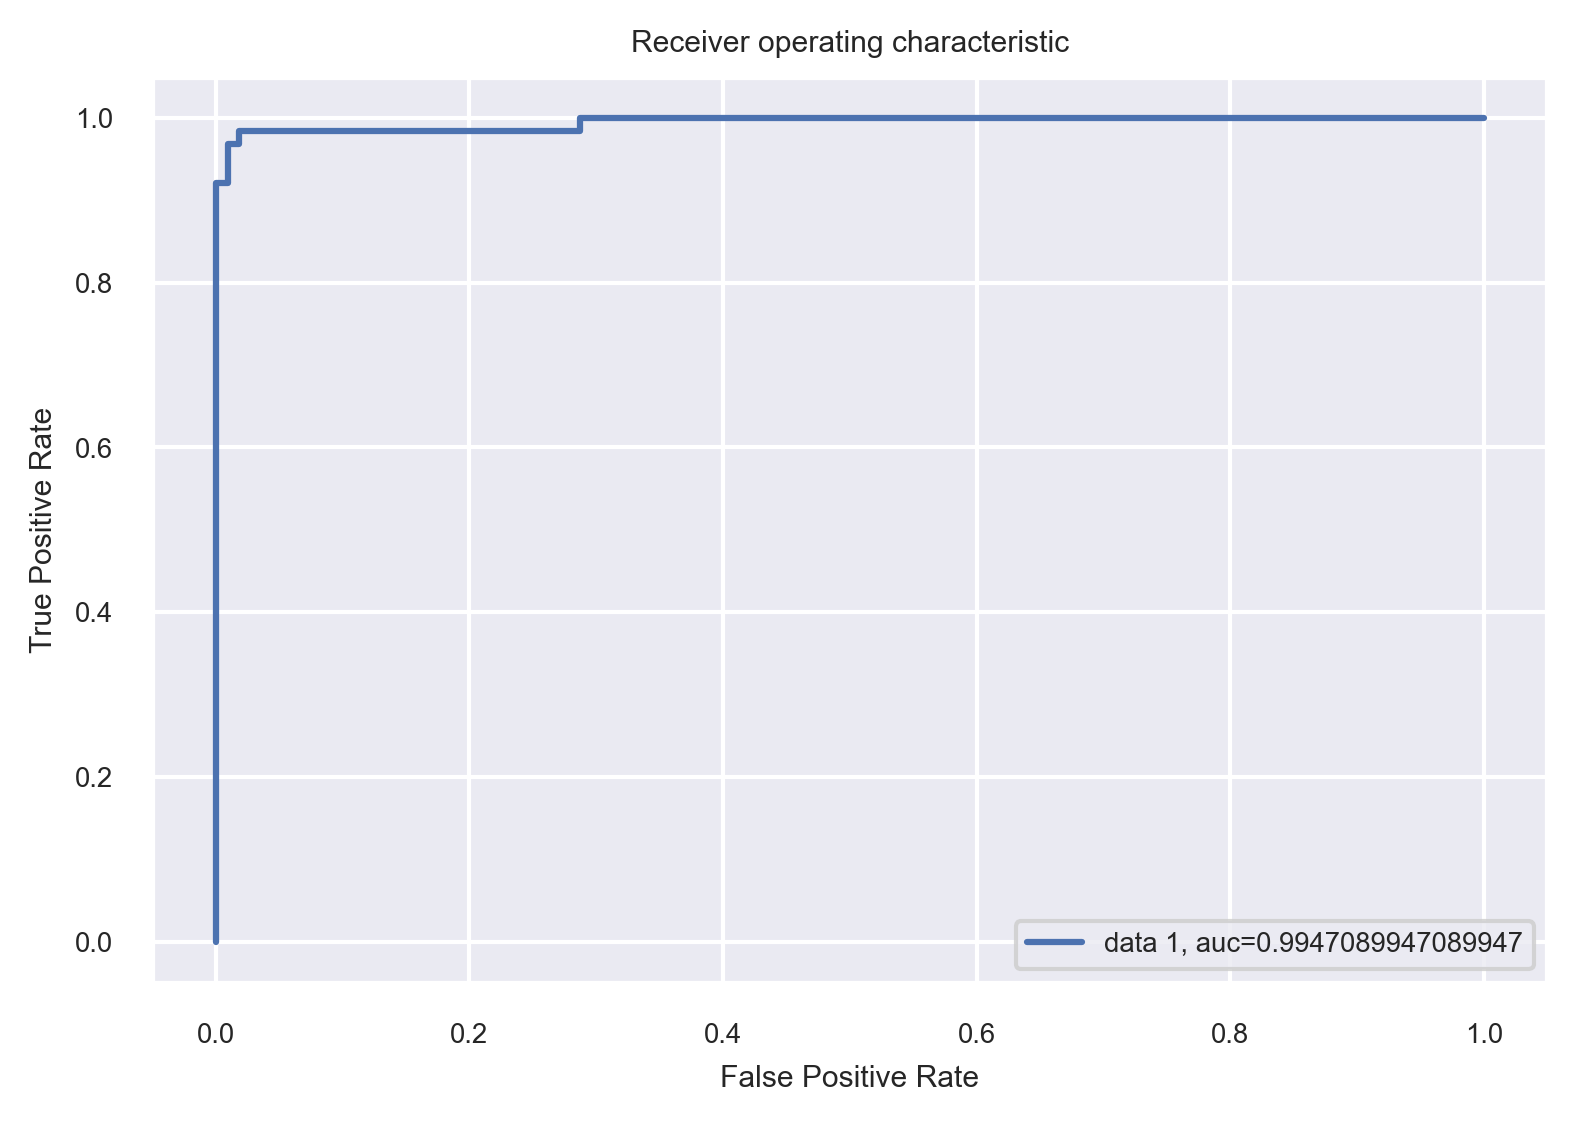

In [54]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of XGBoost is 0.995**

## Support Vector Machine (SVM)

In [55]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=14, probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Test accuracy: ",svm.score(X_test, y_test))
print("Train accuracy: ",svm.score(X_train,y_train))

Test accuracy:  0.9883040935672515
Train accuracy:  0.9723618090452262


Training dataset score and testing dataset score are almost similar and also high so it is not overfitting also not underfitting.

In [56]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



**Accuracy of SVM model is 99%**

### Confusion Matrix of SVM

<AxesSubplot:>

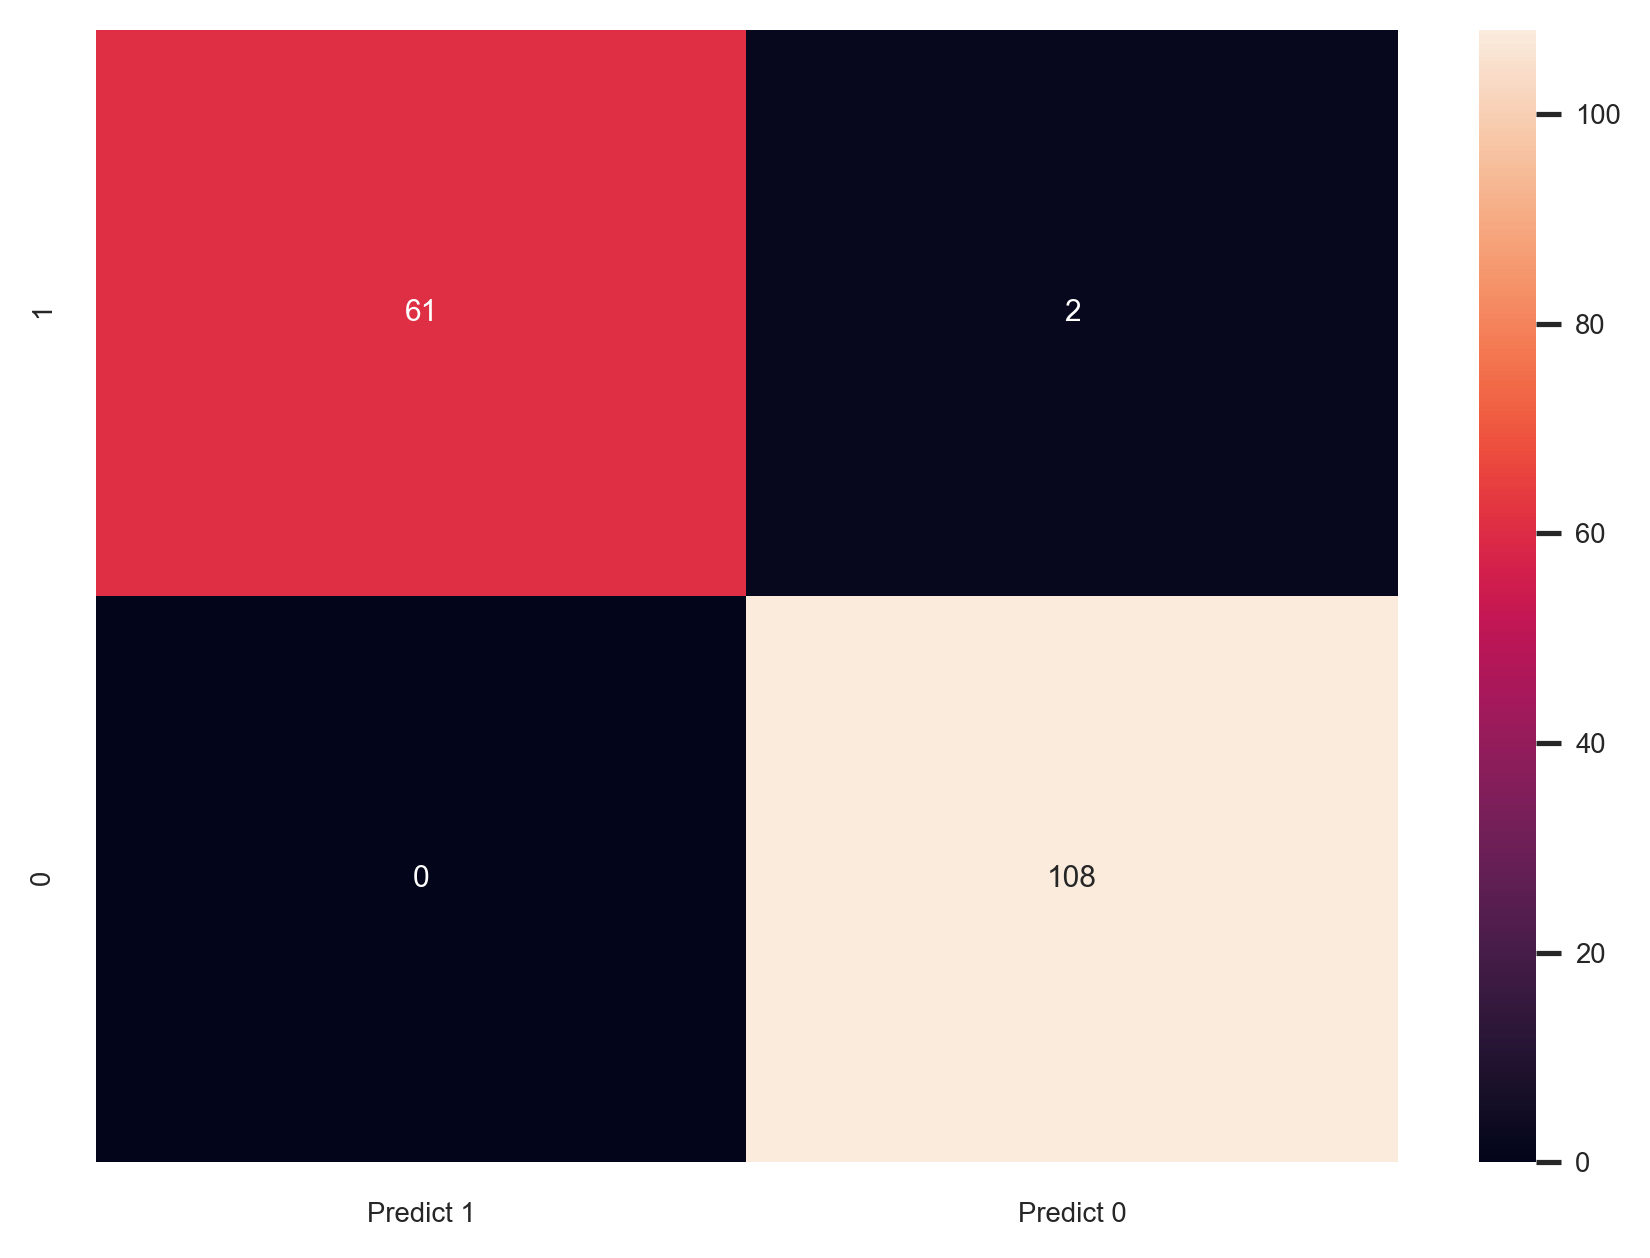

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

**Observations:**

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).



**Rates as computed from the confusion matrix**

***Accuracy***: Overall, how often is the classifier correct?

--> (TP+TN)/total = (61+108)/171 = 0.988

***Misclassification Rate***: Overall, how often is it wrong?

-->(FP+FN)/total = (0+2)/171 = 0.012 equivalent to **1 minus Accuracy also known as "Error Rate"**.

***True Positive Rate***: When it's actually yes, how often does it predict 1?

-->TP/actual yes = 61/63 = 0.968 also known as **"Sensitivity" or "Recall"**

***False Positive Rate***: When it's actually 0, how often does it predict 1?

-->FP/actual no = 0/108+0 = 0

***Specificity***: When it's actually 0, how often does it predict 0? also know as **true positive rate**

-->TN/actual no = 108/108+0 = 1.0 equivalent to **1 minus False Positive Rate**

***Precision***: When it predicts 1, how often is it correct?

-->TP/predicted yes = 61/61+0 = 1.0

***Prevalence***: How often does the yes condition actually occur in our sample?

-->actual yes/total = 61+2/171 = 0.368

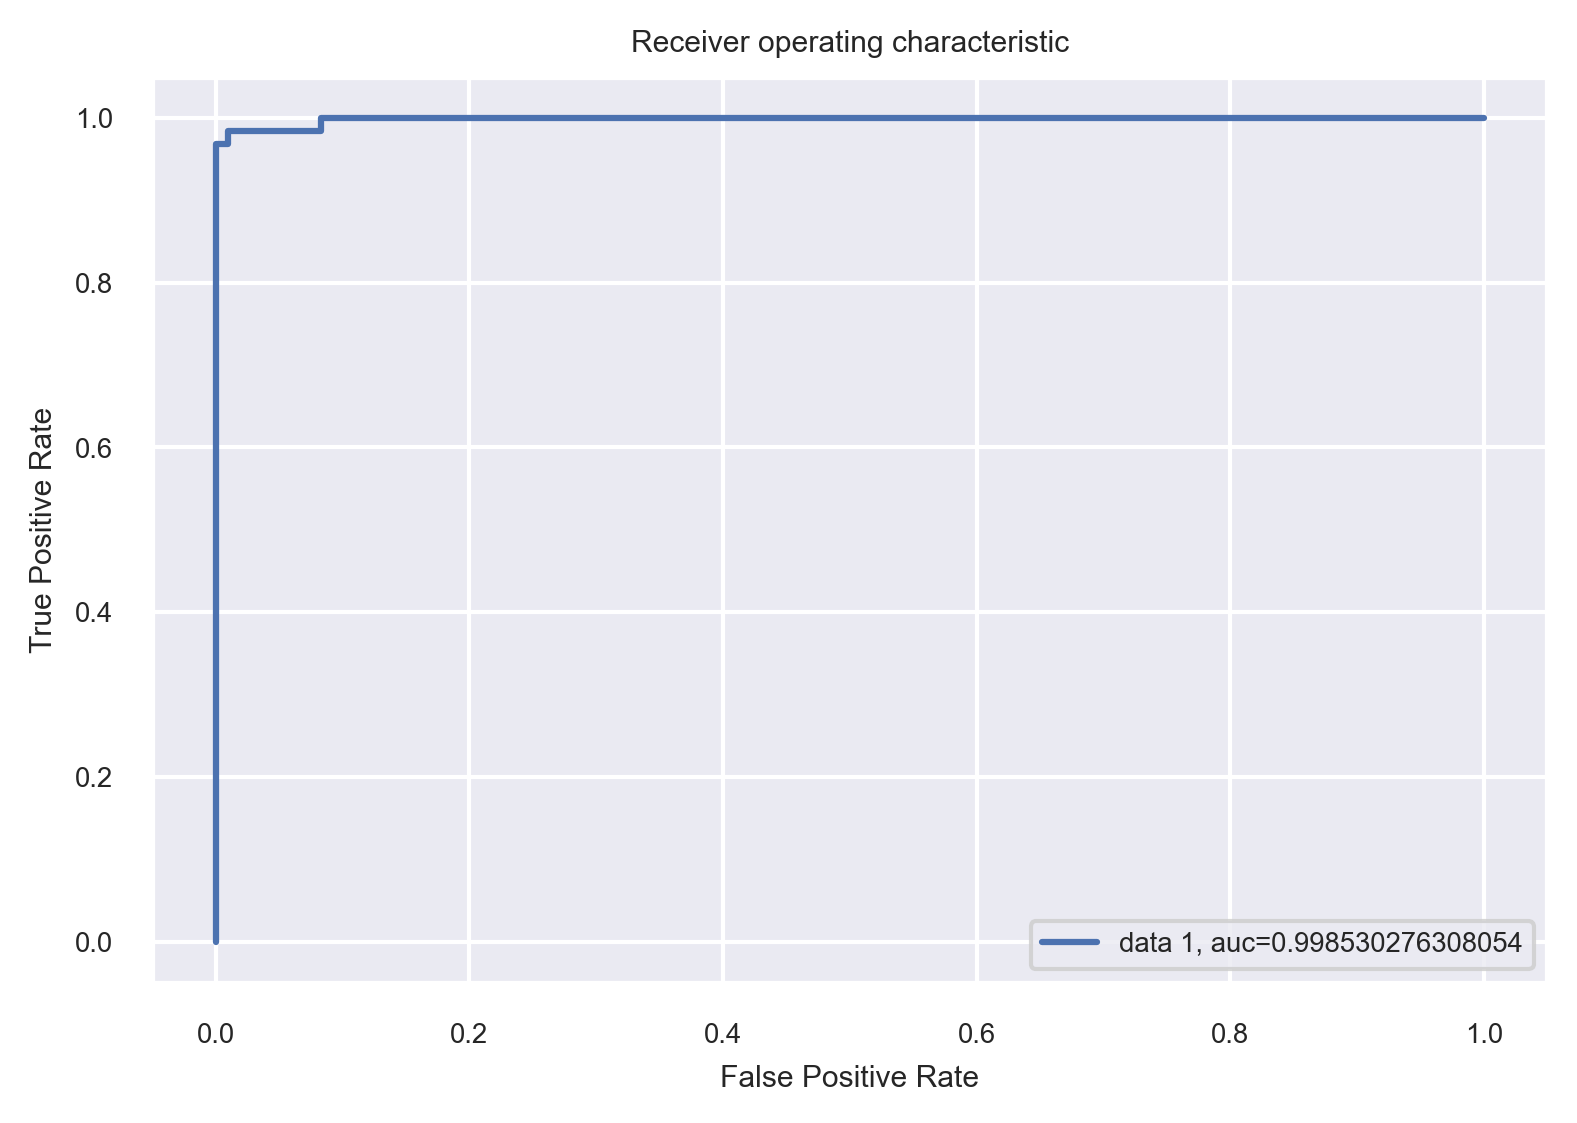

In [58]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**AUC score of SVM is 0.999**

# Comparision of all Models

In [59]:
data = {"Model name": ["Logistic Regression","Decision Tree Classifier","Bagging", "AdaBoost", "Random Forest Classifier", "kNN", "XGBoost", "SVM"], "Accuracy(%)": ["98", "96", "96", "98", "96", "96", "98", "99"], "AUC Score": ["0.998","0.959","0.993","0.996","0.997","0.987", "0.995","0.999"]}
Companrison = pd.DataFrame(data)
Companrison

,Model name,Accuracy(%),AUC Score
0,Logistic Regression,98,0.998
1,Decision Tree Classifier,96,0.959
2,Bagging,96,0.993
3,AdaBoost,98,0.996
4,Random Forest Classifier,96,0.997
5,kNN,96,0.987
6,XGBoost,98,0.995
7,SVM,99,0.999


**All Model have good AUC Score but among them, Support Vector Machine (SVM) Model has highest AUC score i.e.0.999. So I will make Prediction System for SVM Model.**

# Prediction System - SVM Model

In [60]:
# Data of Malignant, to test on prediction system
df.iloc[0].values

array(['M', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
       0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
       0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0,
       0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], dtype=object)

In [61]:
# Data of Benign, to test on prediction system
df.iloc[19].values

array(['B', 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664,
       0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462,
       0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7,
       711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259], dtype=object)

In [62]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Breast Cancer Detected (Malignant)" if svm.predict(in_data_sca) else "No Breast Cancer Detected (Benign)")

13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664,        0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462,        0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7,        711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259
No Breast Cancer Detected (Benign)
